# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2024

**Rotación de Personal - IBM**

#### **Nombre y matrícula:**
# Javier Augusto Rebull Saucedo A01795838


#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [1]:
# Importar las librerías necesarias
import pandas as pd  # Para análisis y manipulación de datos
import numpy as np  # Para operaciones matemáticas y manejo de arreglos
import seaborn as sns  # Para visualización de datos estadísticos
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones personalizadas
import math  # Para realizar operaciones matemáticas, como redondear filas en los gráficos

# Scikit-learn para el modelado y transformación de datos
from sklearn.model_selection import train_test_split  # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Para métricas de evaluación
from sklearn.pipeline import Pipeline  # Para crear flujos de transformación de datos en pasos secuenciales
from sklearn.compose import ColumnTransformer  # Para aplicar diferentes transformaciones a distintas columnas
from sklearn.impute import SimpleImputer  # Para manejar valores faltantes (rellenarlos con una estrategia específica)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder  # Para escalar datos y codificar variables categóricas
from sklearn.linear_model import LogisticRegression  # Para construir modelos de regresión logística
from sklearn.neighbors import KNeighborsClassifier  # Para implementar el modelo k-Vecinos más cercanos (kNN)
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score  # Para realizar búsquedas de hiperparámetros y validación cruzada

# IPython para la visualización en Notebooks
from IPython.display import display, HTML  # Para mostrar texto en colores utilizando HTML dentro de Jupyter Notebooks

# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++

---

# El problema de la rotación de personal "Employee Attrition Problem"

El problema de la rotación de personal, también conocido como *employee attrition*, es uno de los mayores desafíos para las organizaciones modernas. Según el **Work Institute’s 2024 Retention Report**, en 2023 aproximadamente **45 millones de trabajadores** en los Estados Unidos renunciaron voluntariamente a sus empleos, lo que representa más del **27% de la fuerza laboral** del país. Este nivel de rotación de personal ha aumentado un **37% desde 2014**, lo que resalta la gravedad del problema.

## Impacto económico de la rotación

La rotación no solo genera altos costos directos e indirectos para las empresas, como la contratación y capacitación de nuevos empleados, sino también pérdidas significativas en productividad. De hecho, el reporte estima que las empresas en EE.UU. gastaron cerca de **900 mil millones de dólares** en 2023 para reemplazar a los empleados que renunciaron.

## Escasez de mano de obra

Una estadística reveladora del reporte es que:

> *“Si cada persona desempleada en los Estados Unidos encontrara un trabajo, aún quedarían **más de 3 millones de puestos vacantes**”*  
(*Work Institute’s 2024 Retention Report*).

Esto subraya la gravedad de la escasez de mano de obra y el reto continuo que enfrentan las organizaciones para atraer y retener talento.

---

**Referencia:**

Work Institute’s 2024 Retention Report. (2024). *Decoding the Emerging Workforce to Accelerate Retention, Engagement, and Profits*. Recuperado el 29 de septiembre de 2024, de https://info.workinstitute.com/decoding-the-emerging-workforce-2024-retention-report

---

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [2]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

df = None  # Inicializa la variable 'df' como None para indicar que el DataFrame aún no se ha cargado

# Cargar el archivo CSV como DataFrame
file_path = '/content/sample_data/WA_Fn-UseC_-HR-Employee-Attrition.csv'  # Especifica la ruta del archivo CSV
df = pd.read_csv(file_path)  # Lee el archivo CSV y lo guarda en un DataFrame llamado 'df'

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

print("Tamaño del DataFrame:", df.shape)  # Imprime las dimensiones del DataFrame (número de filas y columnas)
print(df.describe(include = 'all').T)  # Usa el método describe para obtener una descripción general de las variables y lo transpone para mejor visualización

Tamaño del DataFrame: (1470, 35)
                           count unique                     top  freq  \
Age                       1470.0    NaN                     NaN   NaN   
Attrition                   1470      2                      No  1233   
BusinessTravel              1470      3           Travel_Rarely  1043   
DailyRate                 1470.0    NaN                     NaN   NaN   
Department                  1470      3  Research & Development   961   
DistanceFromHome          1470.0    NaN                     NaN   NaN   
Education                 1470.0    NaN                     NaN   NaN   
EducationField              1470      6           Life Sciences   606   
EmployeeCount             1470.0    NaN                     NaN   NaN   
EmployeeNumber            1470.0    NaN                     NaN   NaN   
EnvironmentSatisfaction   1470.0    NaN                     NaN   NaN   
Gender                      1470      2                    Male   882   
HourlyRate        

# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++

# La diferencia clave entre utilizar el argumento `include="all"` y no usarlo en el método `describe()` es la siguiente:


# - **Sin `include="all"`**: El método `describe()` por defecto solo devuelve un resumen estadístico de las columnas **numéricas** del DataFrame. Esto incluye métricas como el conteo de valores, la media, la desviación estándar, el valor mínimo y máximo, así como los percentiles 25, 50 (mediana) y 75.



```

```



# - **Con `include="all"`**: Al agregar el argumento `include="all"`, el método devuelve un resumen estadístico para **todas las columnas**, incluidas las **categóricas** (de tipo texto u objeto). Para estas variables categóricas, muestra información como el número de valores únicos, el valor más frecuente (modo) y cuántas veces aparece ese valor.



```

```


# Usar `include="all"` es útil cuando el DataFrame contiene tanto datos numéricos como categóricos, ya que proporciona una vista más completa y general de todas las variables.


```

```

# **Bibliografía**

# **McKinney, W. (2017).** *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython* (2nd ed.). O'Reilly Media.
# **Capítulo 5: Getting Started with pandas.**


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

## **a) Over18:**
   Este factor se puede cancelar porque todos los empleados tienen el mismo valor "Y" en esta columna, lo que significa que no aporta ninguna variabilidad o información relevante para el análisis.

## **b) EmployeeCount:**
   Este factor se puede cancelar ya que todos los empleados tienen el mismo valor (1), lo que indica que no hay diferencias entre los empleados en esta variable, haciéndola irrelevante para el análisis.

## **c) StandardHours:**
   Al igual que los anteriores, todos los empleados tienen el mismo valor (80) en esta columna, lo que significa que no contribuye a diferenciar empleados en nuestro análisis, por lo que se puede eliminar.

## **d) EmployeeNumber:**
   Esta variable es simplemente un identificador único de cada empleado, por lo que no tiene relación directa con el problema de abandono y no aporta información útil para predecir el comportamiento de los empleados.



```

```



**Bibliografía**

**McKinney, W. (2017).** *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython* (2nd ed.). O'Reilly Media.  
**Capítulo 5: Getting Started with pandas.**

++++++++ Termina la sección de agregar texto. +++++++++++




In [3]:
# Eliminamos los factores indicados:

# Estamos eliminando las columnas 'Over18', 'EmployeeCount', 'StandardHours' y 'EmployeeNumber' del DataFrame 'df'.
columns_to_drop = ['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber']

# Verificamos cuáles columnas existen en el DataFrame antes de eliminarlas
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Usamos el método drop() de pandas, indicando el 'axis=1' porque queremos eliminar columnas (si fuera 0, eliminaría filas).
df = df.drop(existing_columns_to_drop, axis=1)

# Resaltamos el resultado en la terminal con colores y un brinco de línea de carro
n_filas, n_columnas = df.shape
print("\n" + "\033[1;33m" + "=" * 50)  # Imprime una línea decorativa en color amarillo y con un brinco de línea de carro
print(f"Tamaño del nuevo DataFrame: {n_filas} filas y {n_columnas} columnas".upper())  # Mensaje en mayúsculas
print("\033[1;33m" + "=" * 50 + "\n")  # Otra línea decorativa en color amarillo con un brinco de línea de carro

# Explicamos qué significa el tamaño del DataFrame
print(f"\033[1;36mEl tamaño del DataFrame indica que actualmente tenemos {n_filas} registros (filas) y {n_columnas} características (columnas) activas para el análisis.\033[0m\n")

# Mostramos cuáles columnas fueron eliminadas
print("\033[1;31mLas siguientes columnas fueron eliminadas: " + ", ".join(existing_columns_to_drop) + "\033[0m\n")


TAMAÑO DEL NUEVO DATAFRAME: 1470 FILAS Y 31 COLUMNAS

El tamaño del DataFrame indica que actualmente tenemos 1470 registros (filas) y 31 características (columnas) activas para el análisis.

Las siguientes columnas fueron eliminadas: Over18, EmployeeCount, StandardHours, EmployeeNumber



# De la documentación de esta base de datos se nos proporciona la siguiente información:

En las variables categóricas, el entero dentro de los paréntesis indica el total de niveles de dicha variable:

### i. Variables numéricas (14):
- **NumCompaniesWorked**
- **TrainingTimesLastYear**
- **Age**
- **DailyRate**
- **DistanceFromHome**
- **HourlyRate**
- **MonthlyIncome**
- **MonthlyRate**
- **PercentSalaryHike**
- **TotalWorkingYears**
- **YearsAtCompany**
- **YearsInCurrentRole**
- **YearsSinceLastPromotion**
- **YearsWithCurrManager**

### ii. Variables ordinales (9):
- **Education** (5)
- **EnvironmentSatisfaction** (4)
- **JobInvolvement** (4)
- **JobLevel** (5)
- **JobSatisfaction** (4)
- **PerformanceRating** (2)
- **RelationshipSatisfaction** (4)
- **StockOptionLevel** (4)
- **WorkLifeBalance** (4)

### iii. Variables binarias (3):
- **Attrition** (variable de salida)
- **Gender**
- **OverTime**

### iv. Variables nominales (5):
- **BusinessTravel** (3)
- **Department** (3)
- **EducationField** (6)
- **JobRole** (9)
- **MaritalStatus** (3)

# **Ejercicio 5:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

#### **NOTA: Utiliza semillas en cada función de partición, para permitir la repetibilidad de tu modelo y poder evaluarlo de mejor manera.**

In [4]:
# 'df' es el DataFrame con los datos y 'Attrition' es la variable objetivo
X = df.drop(columns=['Attrition'])  # X contiene todas las columnas menos 'Attrition'
y = df['Attrition']  # y es la columna 'Attrition', que será nuestra variable de salida

# Primera partición: Entrenamiento (70%) y conjunto temporal (30%)
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Segunda partición: Validación (15%) y Prueba (15%)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.50, stratify=ytemp, random_state=42)

# Desplieguede Resultados
print("\033[1;32m" + "=" * 60)  # Línea decorativa en verde
print("\033[1;34mDimensiones de los conjuntos de datos:\033[0m")  # Titulo en color Azul
print("\033[1;32m" + "=" * 60 + "\033[0m\n")  # Línea decorativa en verde

# Mostramos las dimensiones de cada conjunto
print("\033[1;33mTamaño de los conjuntos:\033[0m")
print(f"Xtrain: {Xtrain.shape[0]} filas, {Xtrain.shape[1]} columnas")  # Dimensiones del conjunto de entrenamiento
print(f"Xval: {Xval.shape[0]} filas, {Xval.shape[1]} columnas")        # Dimensiones del conjunto de validación
print(f"Xtest: {Xtest.shape[0]} filas, {Xtest.shape[1]} columnas")     # Dimensiones del conjunto de prueba
print(f"ytrain: {ytrain.shape[0]} filas")  # Dimensiones de la salida del conjunto de entrenamiento
print(f"yval: {yval.shape[0]} filas")      # Dimensiones de la salida del conjunto de validación
print(f"ytest: {ytest.shape[0]} filas\n")  # Dimensiones de la salida del conjunto de prueba

# Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.
print("\033[1;36mInfo:\033[0m Los tres conjuntos se han dividido como sigue:")
print(f"- \033[1;33mEntrenamiento\033[0m contiene el 70% de los datos totales.")
print(f"- \033[1;33mValidación\033[0m contiene el 15% de los datos totales.")
print(f"- \033[1;33mPrueba\033[0m contiene el 15% de los datos totales.")
print("\n\033[1;32m" + "=" * 60 + "\033[0m")  # Línea decorativa

Dimensiones de los conjuntos de datos:

Tamaño de los conjuntos:
Xtrain: 1029 filas, 30 columnas
Xval: 220 filas, 30 columnas
Xtest: 221 filas, 30 columnas
ytrain: 1029 filas
yval: 220 filas
ytest: 221 filas

Info: Los tres conjuntos se han dividido como sigue:
- Entrenamiento contiene el 70% de los datos totales.
- Validación contiene el 15% de los datos totales.
- Prueba contiene el 15% de los datos totales.



# **Ejercicio 6:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [5]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

# Creamos el codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicamos la transformación LabelEncoder a los conjuntos de entrenamiento, validación y prueba (ytrain, yval, ytest)
ytrainT = label_encoder.fit_transform(ytrain)  # Entrenamos el codificador en el conjunto de entrenamiento
yvalT = label_encoder.transform(yval)          # Aplicamos la transformación a validación
ytestT = label_encoder.transform(ytest)        # Aplicamos la transformación a prueba

# Convertimos ytrainT a un DataFrame para utilizar .value_counts()
ytrainT_df = pd.DataFrame(ytrainT, columns=['Attrition'])

# Título con formato elegantioso
print("\n" + "\033[1;34m" + "=" * 60 + "\033[0m")  # Línea azul
print("\033[1;36m*** Distribución de datos en el conjunto de entrenamiento - Attrition ***\033[0m")
print("\033[1;34m" + "=" * 60 + "\033[0m\n")   # Línea azul

# Mostramos el porcentaje de datos en cada clase
proporciones = ytrainT_df['Attrition'].value_counts(normalize=True) * 100

# Distribuimos los porcentajes con colores y descripciones
for clase, porcentaje in proporciones.items():
    if clase == 0:
        clase_str = "No Attrition (Clase 0)"
        color = "\033[1;32m"  # Verde
    else:
        clase_str = "Attrition (Clase 1)"
        color = "\033[1;31m"  # Rojo
    # Mostramos los porcentajes con su color y formato
    print(f"{color}{clase_str}: {porcentaje:.2f}%\033[0m")

# Línea decorativa final
print("\033[1;34m" + "=" * 60 + "\033[0m\n")

# Análisis de si el conjunto está desbalanceado
print("\033[1;36m*** Análisis de Clasificación Desbalanceada ***\033[0m")
if proporciones.iloc[0] > 70:
    print("\033[1;31mProblema de clasificación desbalanceado: La clase 'No Attrition' representa más del 70% de los datos.\033[0m")
else:
    print("\033[1;32mNo parece haber un problema de clasificación desbalanceado: Las clases están balanceadas.\033[0m")

print("\n") # salto de carro

# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# Linea Correjida por Dr. Luis Eduardo Falcón Morales correo enviado Sept 27, 2024
print('Porcentaje de datos en cada clase de entrenamiento - Attrition:', ytrainT_df['Attrition'].value_counts() / ytrainT_df.shape[0])

# Referencias
#	McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O’Reilly Media.
# VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O’Reilly Media.
# Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O. & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning.


print("\n") # salto de carro
print("Referencias:")
print("McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O’Reilly Media.")
print("VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O’Reilly Media.")
print("Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O. & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning.")


*** Distribución de datos en el conjunto de entrenamiento - Attrition ***

No Attrition (Clase 0): 83.87%
Attrition (Clase 1): 16.13%

*** Análisis de Clasificación Desbalanceada ***
Problema de clasificación desbalanceado: La clase 'No Attrition' representa más del 70% de los datos.


Porcentaje de datos en cada clase de entrenamiento - Attrition: Attrition
0    0.838678
1    0.161322
Name: count, dtype: float64


Referencias:
McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O’Reilly Media.
VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O’Reilly Media.
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O. & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning.


# **Ejercicio 7:**


#### **Incluye a continuación el análisis gáfico y describtivo que consideres adecuado. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**


Estadísticas descriptivas del conjunto de entrenamiento (formato tabla):



count          mean          std     min     25%  \
Age                       1029.0     36.945578     9.165414    18.0    30.0   
DailyRate                 1029.0    809.543246   397.666730   103.0   479.0   
DistanceFromHome          1029.0      9.298348     8.160561     1.0     2.0   
Education                 1029.0      2.893100     1.031715     1.0     2.0   
EnvironmentSatisfaction   1029.0      2.706511     1.085528     1.0     2.0   
HourlyRate                1029.0     65.141885    20.345204    30.0    47.0   
JobInvolvement            1029.0      2.731778     0.709833     1.0     2.0   
JobLevel                  1029.0      2.082604     1.084906     1.0     1.0   
JobSatisfaction           1029.0      2.706511     1.109460     1.0     2.0   
MonthlyIncome             1029.0   6548.270165  4611.459610  1009.0  2994.0   
MonthlyRate               1029.0  14465.365403  7231.472741  2094.0  8053.0   
NumCompaniesWorked        1029.0      2.720117     2.497351     0.0     1.0   
PercentSalaryHike         1029.0     15.196307     3.644241    11.0    12.0   
PerformanceRating         1029.0      3.154519     0.361621     3.0     3.0   
RelationshipSatisfaction  1029.0      2.744412     1.088398     1.0     2.0   
StockOptionLevel          1029.0      0.791059     0.846185     0.0     0.0   
TotalWorkingYears         1029.0     11.323615     7.688945     0.0     6.0   
TrainingTimesLastYear     1029.0      2.741497     1.240230     0.0     2.0   
WorkLifeBalance           1029.0      2.759961     0.715116     1.0     2.0   
YearsAtCompany            1029.0      6.938776     5.950930     0.0     3.0   
YearsInCurrentRole        1029.0      4.233236     3.583634     0.0     2.0   
YearsSinceLastPromotion   1029.0      2.189504     3.222919     0.0     0.0   
YearsWithCurrManager      1029.0      4.130224     3.535334     0.0     2.0   

                              50%      75%      max  
Age                          36.0     43.0     60.0  
DailyRate                   805.0   1157.0   1499.0  
DistanceFromHome              7.0     14.0     29.0  
Education                     3.0      4.0      5.0  
EnvironmentSatisfaction       3.0      4.0      4.0  
HourlyRate                   65.0     82.0    100.0  
JobInvolvement                3.0      3.0      4.0  
JobLevel                      2.0      3.0      5.0  
JobSatisfaction               3.0      4.0      4.0  
MonthlyIncome              5063.0   8446.0  19973.0  
MonthlyRate               14506.0  21016.0  26999.0  
NumCompaniesWorked            2.0      4.0      9.0  
PercentSalaryHike            14.0     18.0     25.0  
PerformanceRating             3.0      3.0      4.0  
RelationshipSatisfaction      3.0      4.0      4.0  
StockOptionLevel              1.0      1.0      3.0  
TotalWorkingYears            10.0     15.0     40.0  
TrainingTimesLastYear         3.0      3.0      6.0  
WorkLifeBalance               3.0      3.0      4.0  
YearsAtCompany                5.0     10.0     37.0  
YearsInCurrentRole            3.0      7.0     17.0  
YearsSinceLastPromotion       1.0      3.0     15.0  
YearsWithCurrManager          3.0      7.0     17.0


Mostrando histogramas de las variables numéricas para entender su distribución.



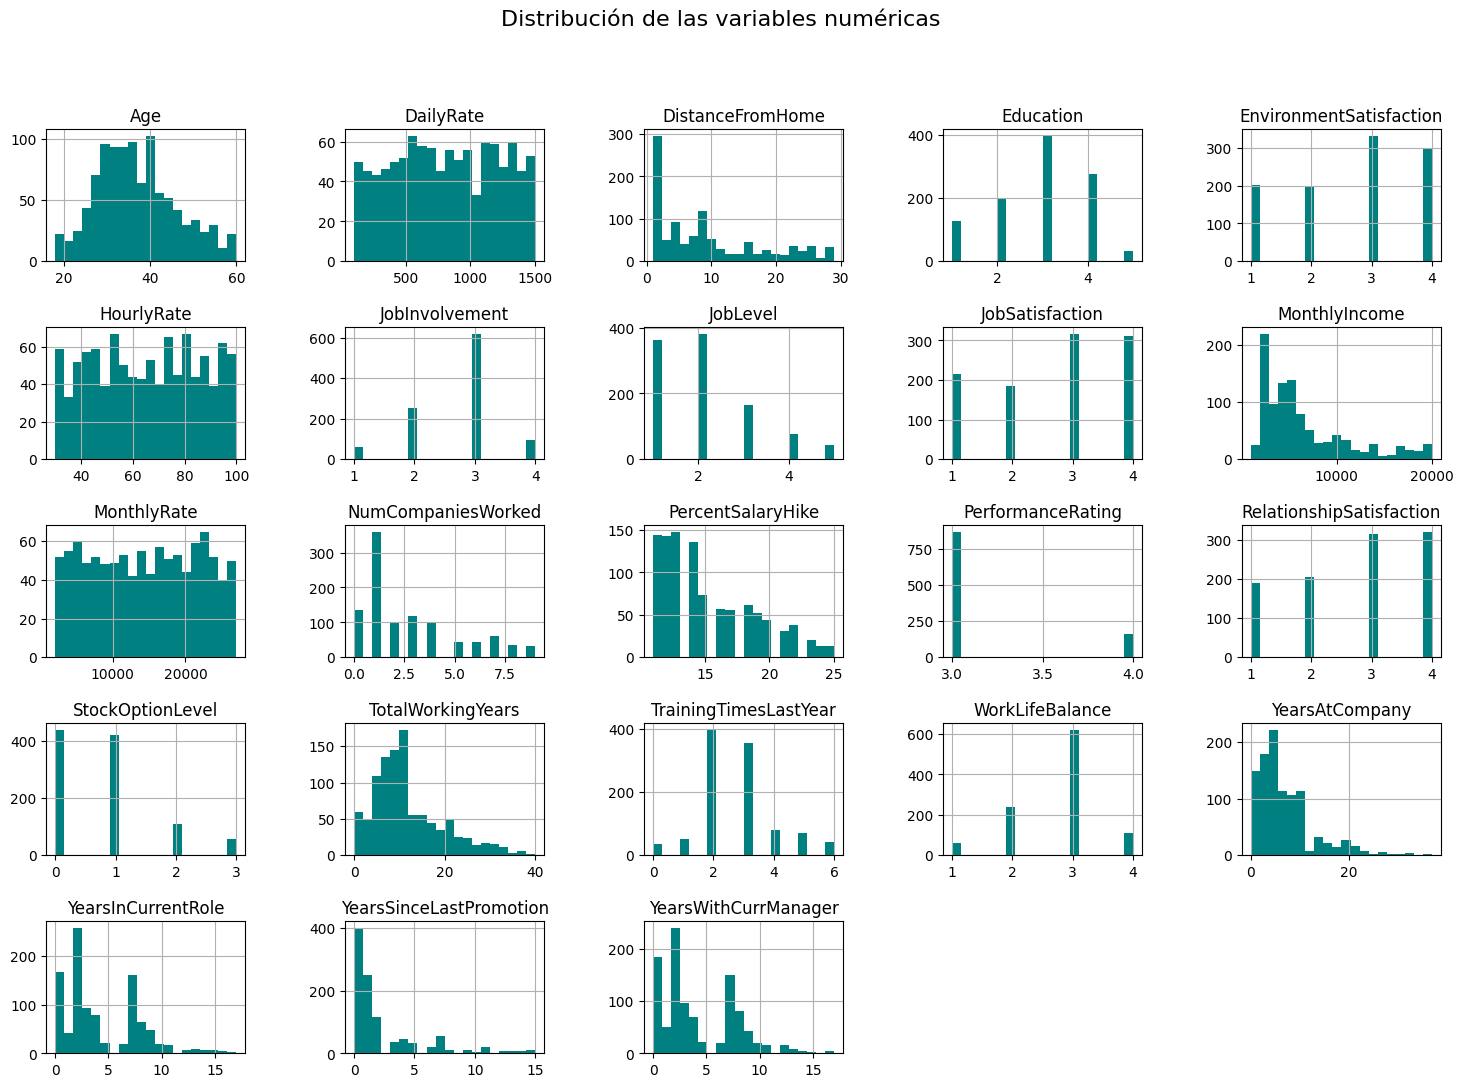


Mostrando mapa de calor de la correlación entre variables numéricas.



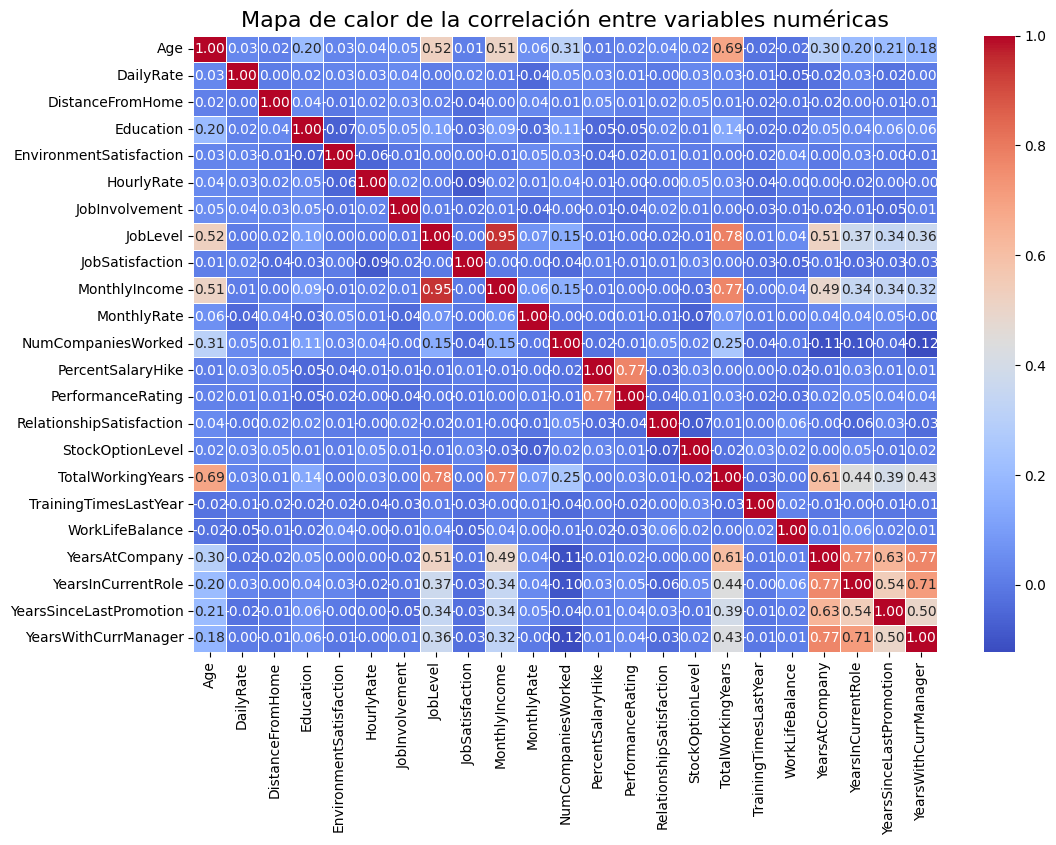


Mostrando Boxplots de las variables numéricas para identificar valores atípicos.



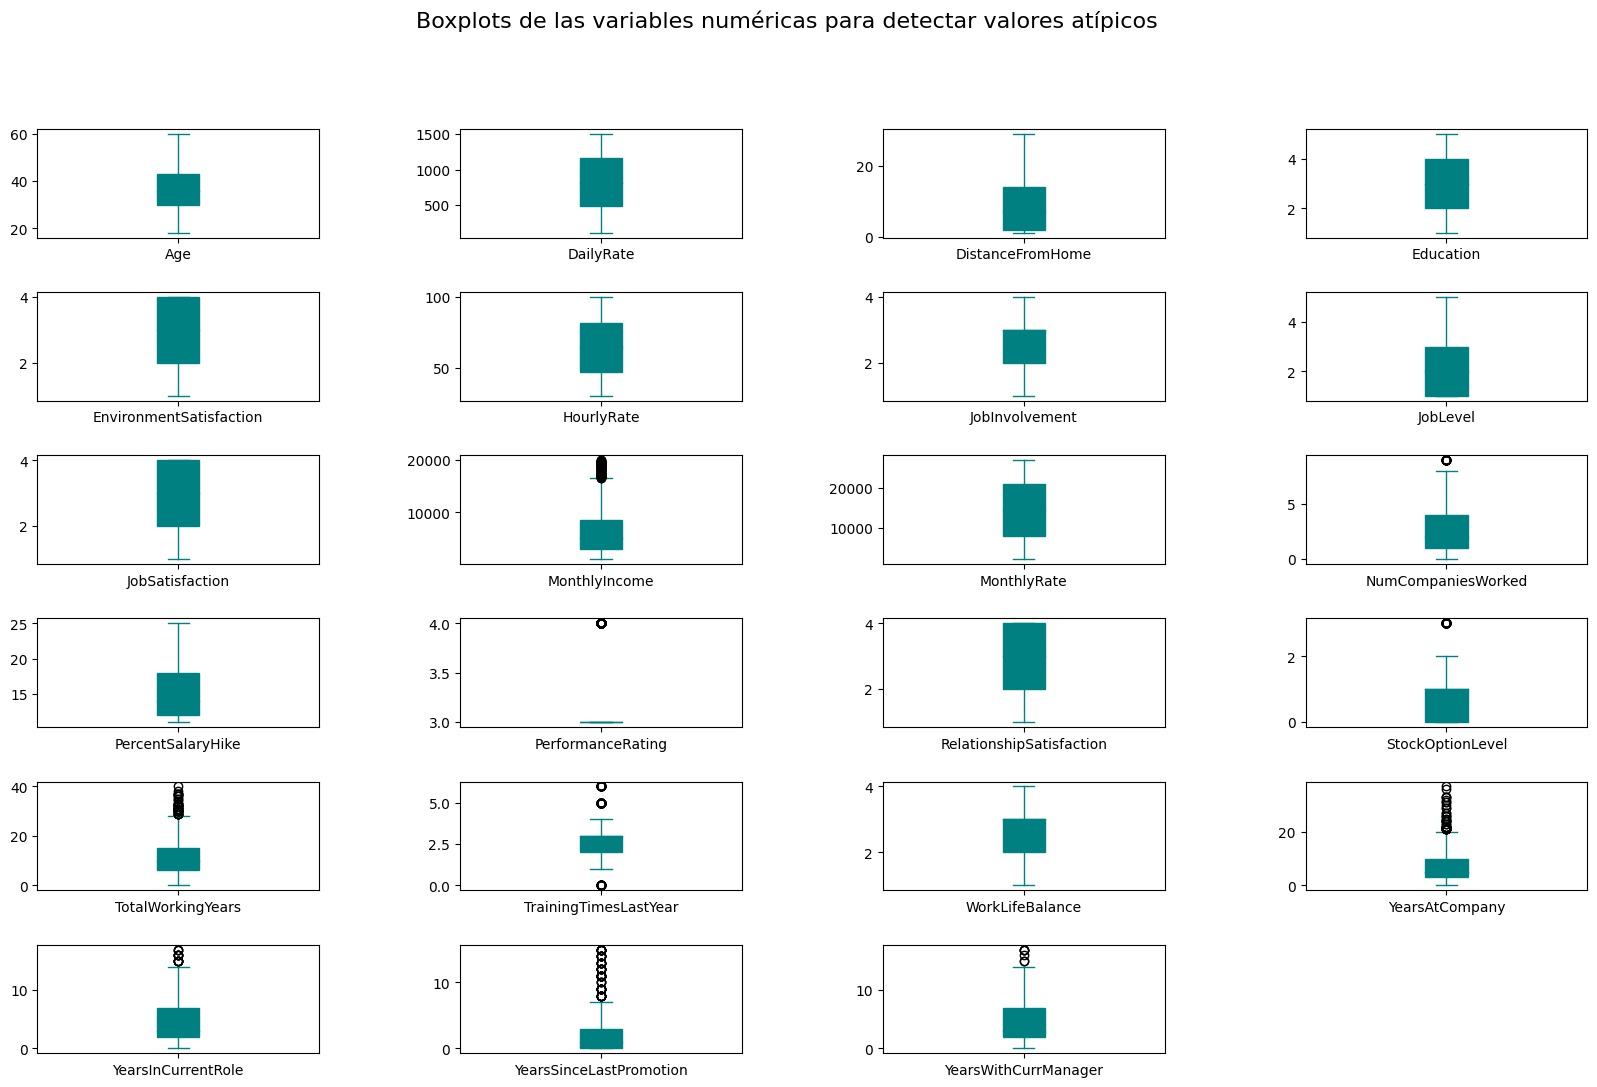


Mostrando la distribución de la variable objetivo 'Attrition'.



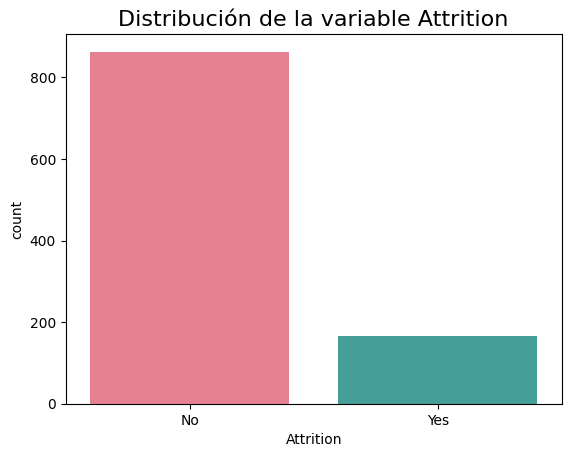


Mostrando la relación entre 'Attrition' y la variable 'JobRole'.



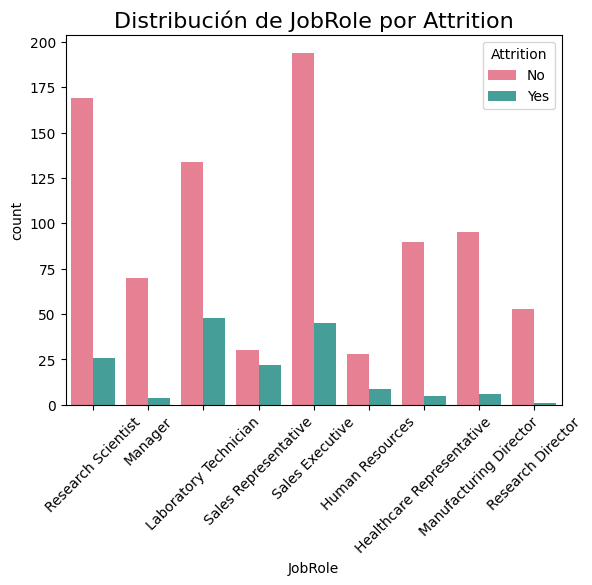


Referencias:

1. Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rd ed.). O'Reilly Media. Capítulo 2. Disponible en: https://biblioteca.tec.mx/oreilly
2. Jafari, R. (2022). Hands-On Data Preprocessing in Python. Packt Publishing. Capítulo 4. Disponible en: https://biblioteca.tec.mx/oreilly
3. Falcón Morales, L. E. (2024, septiembre 23). Videos proporcionados para la materia Inteligencia Artificial y Aprendizaje Automático (IAyAA). Tecnológico de Monterrey.
4. Falcón Morales, L. E. (2024). Maestría en Inteligencia Artificial Aplicada: Curso de Inteligencia Artificial y Aprendizaje Automático. Actividad de Semana 3: Regresión Logística y problemas de crédito [Archivo Jupyter Notebook]. Tecnológico de Monterrey.
5. Falcón Morales, L. E. (2024). k-Vecinos más cercanos: kNN (k-Nearest Neighbors) [Presentación PDF]. Tecnológico de Monterrey. Disponible en el curso de la Maestría en Inteligencia Artificial Aplicada.
6. Falcón Morales, L. E. (2024). Matr

In [6]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres conveniente.

# 1. Estadísticas descriptivas en formato de tabla
print("\033[1;36m\nEstadísticas descriptivas del conjunto de entrenamiento (formato tabla):\033[0m\n")
desc_stats = Xtrain.describe().T  # Transponemos el describe para que sea más legible como tabla
display(desc_stats)  # Usamos display para mostrar la tabla de manera legible en Colab

# 2. Verificamos si el DataFrame tiene datos y mostramos histogramas
if Xtrain.empty:
    print("El DataFrame 'Xtrain' está vacío.")
else:
    # Histograma de variables numéricas con más espacio y ajuste dinámico del layout
    print("\033[1;36m\nMostrando histogramas de las variables numéricas para entender su distribución.\033[0m\n")
    num_numeric_cols = Xtrain.select_dtypes(include=['float64', 'int64']).shape[1]  # Contamos cuántas variables numéricas tenemos
    rows = math.ceil(num_numeric_cols / 4)  # Calculamos cuántas filas necesitamos

    # Generamos histogramas sin layout y permitimos que pandas lo gestione
    Xtrain.select_dtypes(include=['float64', 'int64']).hist(figsize=(18, 12), bins=20, color='teal')
    plt.suptitle('Distribución de las variables numéricas', fontsize=16)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajustamos el espacio entre los gráficos
    plt.show()

# 3. Mapa de calor de la correlación entre variables numéricas
print("\033[1;36m\nMostrando mapa de calor de la correlación entre variables numéricas.\033[0m\n")
Xtrain_numeric = Xtrain.select_dtypes(include=['float64', 'int64'])  # Filtramos columnas numéricas

if Xtrain_numeric.empty:
    print("El DataFrame 'Xtrain_numeric' está vacío.")
else:
    plt.figure(figsize=(12, 8))
    sns.heatmap(Xtrain_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Mapa de calor de la correlación entre variables numéricas", fontsize=16)
    plt.show()

# 4. Boxplots para detectar valores atípicos en variables numéricas
print("\033[1;36m\nMostrando Boxplots de las variables numéricas para identificar valores atípicos.\033[0m\n")

if Xtrain_numeric.empty:
    print("El DataFrame 'Xtrain_numeric' está vacío.")
else:
    # En lugar de gestionar ejes, dejamos que pandas gestione los subplots automáticamente
    Xtrain_numeric.plot(kind='box', subplots=True, layout=(math.ceil(len(Xtrain_numeric.columns) / 4), 4),
                        figsize=(20, 12), color='teal', patch_artist=True)
    plt.suptitle('Boxplots de las variables numéricas para detectar valores atípicos', fontsize=16)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajustamos el espacio entre los gráficos
    plt.show()

# 5. Análisis de la variable objetivo (Attrition) con `hue`
print("\033[1;36m\nMostrando la distribución de la variable objetivo 'Attrition'.\033[0m\n")
sns.countplot(x=ytrain, hue=ytrain, palette='husl', legend=False)  # Usamos hue correctamente para eliminar la advertencia
plt.title("Distribución de la variable Attrition", fontsize=16)
plt.show()

# 6. Relación entre 'Attrition' y otras variables categóricas (JobRole)
print("\033[1;36m\nMostrando la relación entre 'Attrition' y la variable 'JobRole'.\033[0m\n")
sns.countplot(x='JobRole', hue=ytrain, data=Xtrain, palette='husl')
plt.title("Distribución de JobRole por Attrition", fontsize=16)
plt.xticks(rotation=45)
plt.show()

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# Referencias
print("\033[1;36m\nReferencias:\033[0m\n")

print("1. Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rd ed.). O'Reilly Media. Capítulo 2. Disponible en: https://biblioteca.tec.mx/oreilly")
print("2. Jafari, R. (2022). Hands-On Data Preprocessing in Python. Packt Publishing. Capítulo 4. Disponible en: https://biblioteca.tec.mx/oreilly")
print("3. Falcón Morales, L. E. (2024, septiembre 23). Videos proporcionados para la materia Inteligencia Artificial y Aprendizaje Automático (IAyAA). Tecnológico de Monterrey.")
print("4. Falcón Morales, L. E. (2024). Maestría en Inteligencia Artificial Aplicada: Curso de Inteligencia Artificial y Aprendizaje Automático. Actividad de Semana 3: Regresión Logística y problemas de crédito [Archivo Jupyter Notebook]. Tecnológico de Monterrey.")
print("5. Falcón Morales, L. E. (2024). k-Vecinos más cercanos: kNN (k-Nearest Neighbors) [Presentación PDF]. Tecnológico de Monterrey. Disponible en el curso de la Maestría en Inteligencia Artificial Aplicada.")
print("6. Falcón Morales, L. E. (2024). Matriz de Confusión [Presentación PDF]. Tecnológico de Monterrey. Disponible en el curso de la Maestría en Inteligencia Artificial Aplicada.")
print("7. McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O’Reilly Media.")
print("8. VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media.")
print("9. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.")

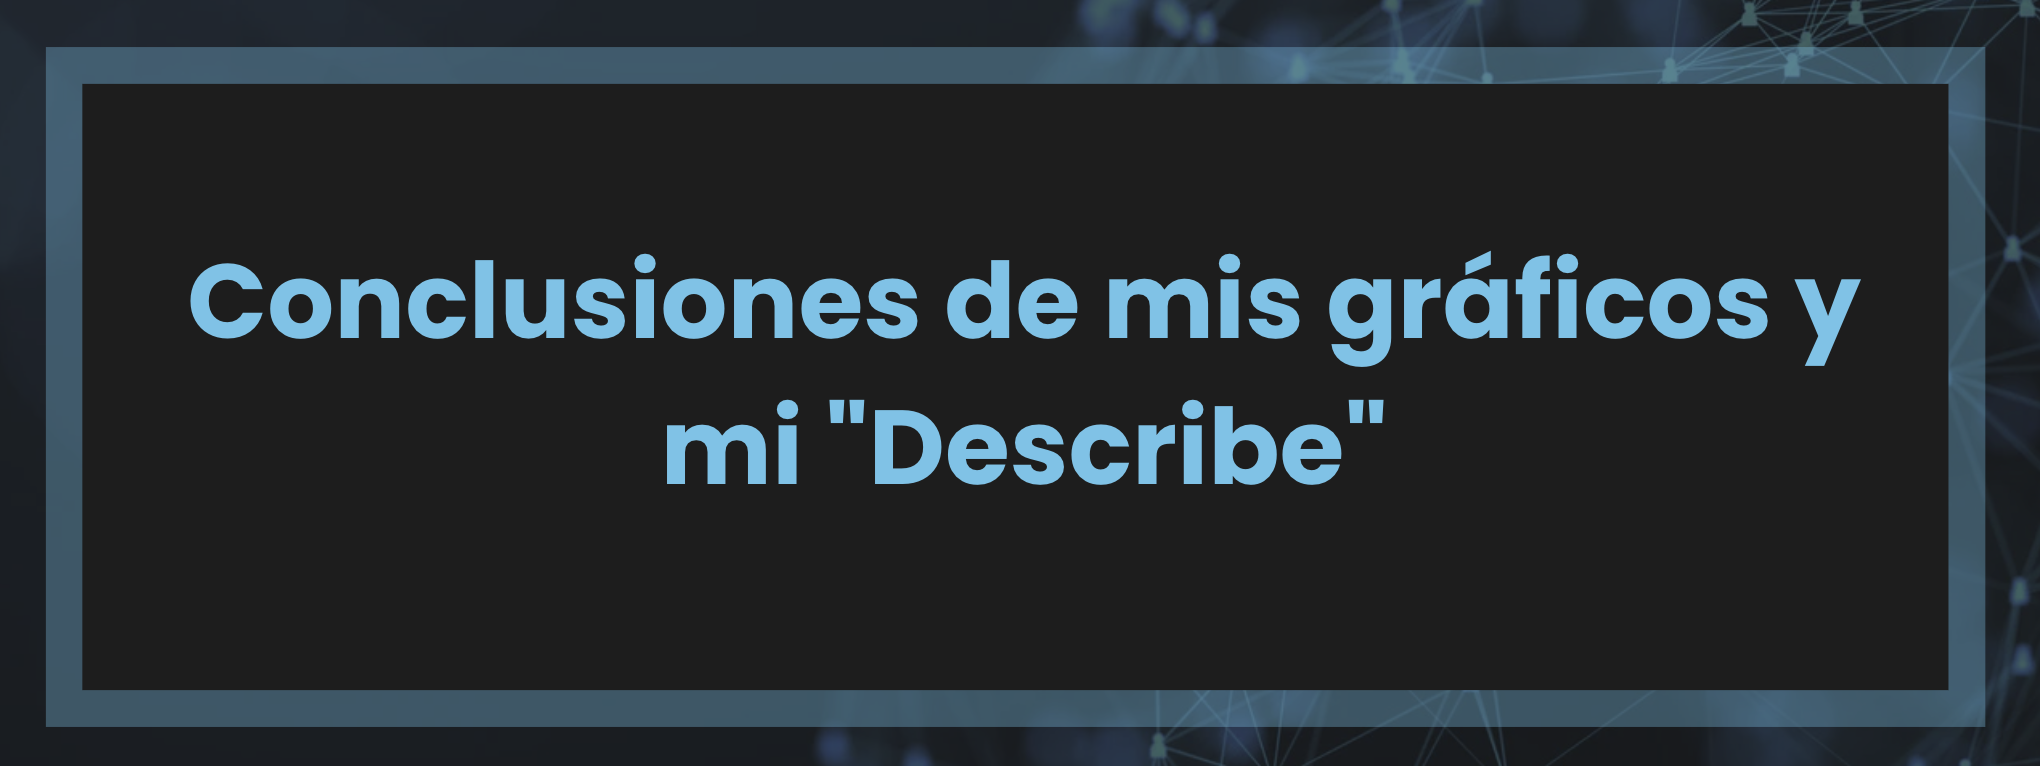



```

```


# Conclusiones basadas en las estadísticas descriptivas:

1. **Edad (Age):**
   - La edad promedio de los empleados es de 36.95 años, con una desviación estándar de 9.17 años, lo que indica una distribución amplia entre empleados jóvenes y mayores. La edad mínima es 18 años y la máxima es 60 años.
   - El rango entre el 25% (30 años) y el 75% (43 años) sugiere que la mayoría de los empleados se encuentra entre esos valores, con una tendencia hacia empleados jóvenes/adultos.

2. **Salario Diario (DailyRate):**
   - El salario diario promedio es de 809.54, con una desviación estándar considerable de 397.67, lo que indica que hay bastante variabilidad entre los sueldos diarios. El rango está entre 479 y 1157, lo que refleja una dispersión amplia en los salarios.

3. **Distancia desde el Hogar (DistanceFromHome):**
   - La distancia promedio de los empleados a su hogar es de 9.3 km, con una desviación estándar de 8.16 km, lo que muestra una gran variabilidad. Algunos empleados viven muy cerca (1 km) y otros hasta 29 km de distancia, lo que podría influir en la satisfacción laboral o en la posibilidad de *Attrition*.

4. **Satisfacción en el Entorno (EnvironmentSatisfaction):**
   - La puntuación promedio de satisfacción con el entorno es de 2.71 (en una escala de 1 a 4), lo que sugiere una satisfacción moderada. La mediana es de 3, lo que indica que muchos empleados están razonablemente satisfechos, aunque hay margen para mejorar.

5. **Ingresos Mensuales (MonthlyIncome):**
   - El ingreso mensual promedio es de 6548.27, con una alta desviación estándar de 4611.46, lo que indica una enorme variabilidad entre los empleados. El rango está entre 2994 y 8446 en el 25% y 75%, pero el valor máximo es de 19973, lo que sugiere la presencia de empleados con ingresos mucho más altos que la mayoría.

6. **Años Totales de Trabajo (TotalWorkingYears):**
   - Los empleados tienen en promedio 11.32 años de experiencia laboral, con una gran variabilidad (SD = 7.69). El mínimo es 0 años y el máximo es 40 años, lo que sugiere que hay una mezcla entre empleados nuevos y otros con carreras largas.

7. **Promociones (YearsSinceLastPromotion):**
   - El promedio de años desde la última promoción es de 2.19 años, pero la mayoría de los empleados no ha sido promovido en los últimos años, como lo indica el 25% con 0 años. Algunos empleados han estado hasta 15 años sin promoción, lo que podría ser un factor para el *Attrition*.

8. **Balance Trabajo-Vida (WorkLifeBalance):**
   - El equilibrio entre trabajo y vida personal tiene un promedio de 2.76 en una escala de 1 a 4, con la mediana en 3, lo que sugiere que la mayoría de los empleados percibe un balance aceptable, aunque algunos pueden estar en el extremo inferior (1).

9. **Años en la Empresa (YearsAtCompany):**
   - Los empleados han estado en la empresa un promedio de 6.94 años, con un rango amplio entre 0 y 37 años. Esto sugiere una mezcla de empleados nuevos y otros con mucha antigüedad.

10. **Número de Compañías Trabajadas (NumCompaniesWorked):**
   - El promedio es de 2.72 compañías, lo que indica que muchos empleados han tenido experiencia laboral en varias empresas antes de su empleo actual. Esto puede sugerir una cierta movilidad laboral.

---

# Conclusiones clave:

- **Variabilidad en el ingreso:** Existe una alta variabilidad en los ingresos mensuales, lo que podría ser un factor significativo en la motivación de los empleados y su permanencia en la empresa.
- **Satisfacción moderada:** Las puntuaciones de satisfacción laboral y balance vida-trabajo indican que la mayoría de los empleados están razonablemente satisfechos, pero no completamente.
- **Promociones limitadas:** Muchos empleados no han sido promovidos en varios años, lo que podría influir en su percepción de oportunidades de crecimiento y en la decisión de dejar la empresa.
- **Experiencia variada:** La empresa parece tener una mezcla de empleados con diferentes niveles de antigüedad, lo que podría influir en las estrategias de retención.



```

```



### Conclusiones basadas en los histogramas de las variables numéricas:

1. **Age (Edad)**:
   - La distribución de la variable `Age` es casi **bimodal**, con un pico alrededor de los **30 años** y otro alrededor de los **40 años**. Esto sugiere que la mayoría de los empleados están en estos rangos de edad, con una menor representación de empleados muy jóvenes o mayores de 50 años.

2. **DailyRate (Tasa diaria)**:
   - La distribución de la variable `DailyRate` parece ser **uniforme**, lo que indica que no hay una concentración clara de empleados en un rango específico de salario diario. Los empleados están distribuidos en varias bandas salariales.

3. **DistanceFromHome (Distancia desde el hogar)**:
   - La mayoría de los empleados viven muy cerca del trabajo, ya que la distribución está concentrada en valores bajos (de 1 a 10 km), con una disminución significativa para distancias mayores. Esto podría indicar que los empleados prefieren vivir cerca de la empresa.

4. **Education (Educación)**:
   - La mayoría de los empleados tiene un nivel de educación entre **2 y 4**, lo que podría corresponder a educación superior (preparatoria, licenciatura, o maestría).

5. **EnvironmentSatisfaction (Satisfacción con el entorno)**:
   - Hay una distribución equitativa de empleados en todos los niveles de satisfacción, pero los niveles **3 y 4** parecen ser los más comunes, lo que indica que la mayoría de los empleados están satisfechos con su entorno laboral.

6. **HourlyRate (Tarifa por hora)**:
   - La variable `HourlyRate` tiene una distribución bastante **uniforme**, lo que sugiere que los empleados reciben una amplia gama de tarifas por hora, sin concentraciones claras en un solo grupo.

7. **JobInvolvement (Participación en el trabajo)**:
   - La mayoría de los empleados se encuentran en el nivel **3** de involucramiento en el trabajo, lo que indica un alto compromiso, aunque hay empleados con menor o mayor nivel de involucramiento.

8. **JobLevel (Nivel de trabajo)**:
   - Los niveles **1 y 2** son los más comunes, lo que sugiere que la mayoría de los empleados ocupan posiciones de nivel bajo o medio dentro de la organización.

9. **MonthlyIncome (Ingreso mensual)**:
   - El ingreso mensual tiene una distribución **sesgada a la derecha**, con muchos empleados concentrados en los rangos más bajos de ingresos. Solo unos pocos empleados ganan salarios muy altos, lo que puede indicar una alta desigualdad salarial.

10. **NumCompaniesWorked (Número de empresas en las que ha trabajado)**:
    - La mayoría de los empleados ha trabajado en **1 o 2 empresas** antes de su empleo actual, lo que indica una estabilidad laboral relativa, aunque algunos empleados han cambiado de trabajo varias veces (hasta 9).

11. **PerformanceRating (Calificación de desempeño)**:
    - La mayoría de los empleados tienen una calificación de desempeño de **3 o 4**, lo que sugiere que la mayoría cumple con las expectativas o supera las expectativas.

12. **StockOptionLevel (Nivel de opciones sobre acciones)**:
    - La mayoría de los empleados tienen **0 o 1** nivel de opciones sobre acciones, lo que podría indicar que las opciones de acciones no son un beneficio generalizado para todos.

13. **TotalWorkingYears (Años totales trabajados)**:
    - La mayoría de los empleados tienen entre **0 y 15 años** de experiencia laboral, con una concentración en los primeros 10 años. Solo unos pocos empleados tienen una experiencia muy extensa (hasta 40 años).

14. **YearsAtCompany (Años en la empresa)**:
    - La mayoría de los empleados han estado en la empresa por **0 a 10 años**, lo que sugiere que la empresa tiene una fuerza laboral relativamente joven, con pocos empleados de larga duración.

15. **YearsSinceLastPromotion (Años desde la última promoción)**:
    - Una gran cantidad de empleados no han sido promovidos en los últimos años (la mayoría tiene **0 años** desde su última promoción), lo que podría ser un factor en la satisfacción y la posible rotación de empleados.

16. **YearsWithCurrManager (Años con el actual gerente)**:
    - La mayoría de los empleados han trabajado con su gerente actual por **menos de 5 años**, lo que indica un posible cambio frecuente de gerentes o estructuras organizacionales.

17. **WorkLifeBalance (Balance entre vida y trabajo)**:
    - La mayoría de los empleados se encuentran en niveles **2 y 3** de balance entre trabajo y vida personal, lo que sugiere que la empresa podría tener margen de mejora en este aspecto.

### Conclusiones clave:
- **Sesgo en los ingresos**: La distribución sesgada de `MonthlyIncome` sugiere una alta variabilidad entre los salarios, lo que podría afectar la moral y la retención de empleados.
- **Poca promoción interna**: Muchos empleados no han sido promovidos recientemente, lo que podría ser un factor clave para la rotación de empleados y la insatisfacción laboral.
- **Distribución por edad y antigüedad**: La empresa parece tener una base de empleados relativamente jóvenes, con poca antigüedad, lo que sugiere que es probable que se enfrente a desafíos en la retención a largo plazo.
- **Experiencia laboral**: Los empleados tienen poca experiencia acumulada en comparación con su tiempo en la empresa, lo que podría afectar la productividad o la necesidad de capacitaciones adicionales.




```

```

### Conclusiones del Mapa de Calor de Correlaciones entre Variables Numéricas:

1. **TotalWorkingYears y MonthlyIncome**:
   - Existe una correlación fuerte de **0.95** entre `TotalWorkingYears` y `MonthlyIncome`, lo cual es intuitivo, ya que a mayor experiencia laboral, es más probable que los empleados reciban salarios más altos. Esto podría indicar que una de estas variables podría ser redundante en algunos modelos de predicción, ya que ofrecen información muy similar.

2. **TotalWorkingYears y JobLevel**:
   - También se observa una alta correlación de **0.78** entre `TotalWorkingYears` y `JobLevel`. Esto sugiere que, a medida que los empleados acumulan más experiencia laboral, tienden a ocupar posiciones de mayor responsabilidad en la empresa.

3. **YearsAtCompany, YearsInCurrentRole y YearsWithCurrManager**:
   - Hay correlaciones moderadamente altas entre `YearsAtCompany`, `YearsInCurrentRole`, y `YearsWithCurrManager`. Por ejemplo, la correlación entre `YearsAtCompany` y `YearsInCurrentRole` es de **0.77**, lo que sugiere que los empleados que han estado más tiempo en la empresa también han ocupado roles similares durante ese tiempo. Además, `YearsWithCurrManager` está correlacionado con `YearsAtCompany` (**0.71**), lo que puede indicar que muchos empleados han tenido al mismo gerente durante gran parte de su carrera en la empresa.

4. **YearsInCurrentRole y YearsSinceLastPromotion**:
   - Hay una correlación moderada de **0.54** entre `YearsInCurrentRole` y `YearsSinceLastPromotion`. Esto podría sugerir que aquellos empleados que han estado en el mismo rol durante mucho tiempo también han pasado más tiempo sin recibir una promoción, lo que podría ser un factor importante a considerar en la satisfacción laboral y el riesgo de abandono.

5. **StockOptionLevel y MonthlyIncome**:
   - Existe una correlación moderada de **0.49** entre `StockOptionLevel` y `MonthlyIncome`, lo que indica que los empleados con salarios más altos tienden a recibir más opciones sobre acciones. Esto es común en muchas empresas, donde los empleados mejor pagados suelen recibir beneficios adicionales como opciones sobre acciones.

6. **YearsAtCompany y TotalWorkingYears**:
   - La correlación entre `YearsAtCompany` y `TotalWorkingYears` es de **0.61**, lo que sugiere que, aunque hay empleados con muchos años de experiencia general, algunos de ellos no han pasado toda su carrera en la misma empresa.

7. **WorkLifeBalance y PerformanceRating**:
   - La correlación entre `WorkLifeBalance` y `PerformanceRating` es muy baja (**0.01**), lo que indica que el equilibrio entre vida y trabajo no tiene una relación directa significativa con el desempeño de los empleados según la calificación que se les asigna.

---

### Conclusiones clave:

- **Redundancia entre variables**: Variables como `TotalWorkingYears` y `MonthlyIncome`, así como `JobLevel`, están altamente correlacionadas. Podrías considerar eliminar una de estas variables para evitar redundancia en los modelos predictivos, dependiendo de los requisitos del análisis.
- **Promoción y retención**: La correlación entre `YearsInCurrentRole` y `YearsSinceLastPromotion` puede ser un indicio de que aquellos empleados que no han sido promovidos en un tiempo podrían estar estancados en sus roles actuales, lo que podría llevar a un mayor riesgo de abandono.
- **Salario y beneficios**: Los empleados con mayores salarios también parecen recibir más opciones sobre acciones. Esto es un incentivo común en muchas empresas, pero es importante evaluar si estos beneficios se distribuyen de manera justa.
- **Tiempo en la empresa y en el rol**: Las correlaciones entre `YearsAtCompany`, `YearsInCurrentRole`, y `YearsWithCurrManager` indican que muchos empleados han tenido una estructura de trabajo estable, permaneciendo con los mismos gerentes por períodos prolongados. Este es un aspecto positivo en términos de estabilidad, pero también puede convertirse en un factor de insatisfacción si no hay crecimiento.




```

```

### Conclusiones basadas en los **boxplots** de las variables numéricas:

1. **Age (Edad)**:
   - La variable `Age` no presenta **valores atípicos** (outliers). La distribución es bastante homogénea y abarca un rango amplio, desde los 18 hasta los 60 años.

2. **DailyRate (Tasa diaria)**:
   - No hay outliers significativos en esta variable. La dispersión de los datos es uniforme, indicando que los salarios diarios no tienen grandes desviaciones extremas.

3. **DistanceFromHome (Distancia desde el hogar)**:
   - No se observan outliers en la variable `DistanceFromHome`. La mayoría de los empleados vive a distancias cortas de la empresa, con un rango máximo de 29 km.

4. **MonthlyIncome (Ingreso mensual)**:
   - Se observan **outliers** en la variable `MonthlyIncome`, con algunos empleados que ganan significativamente más que la mayoría. Estos outliers pueden influir en el análisis y deberían tratarse con cuidado, ya que representan diferencias salariales extremas.

5. **NumCompaniesWorked (Número de empresas trabajadas)**:
   - Existen algunos outliers en la variable `NumCompaniesWorked`. Estos outliers representan empleados que han trabajado en muchas más empresas que el promedio (hasta 9 empresas), lo que puede indicar una mayor movilidad laboral.

6. **TotalWorkingYears (Años totales trabajados)**:
   - Hay varios outliers en `TotalWorkingYears`, con algunos empleados que tienen hasta 40 años de experiencia laboral, lo que es considerablemente mayor que el promedio. Este tipo de experiencia extensa puede afectar el análisis de las trayectorias laborales.

7. **TrainingTimesLastYear (Cantidad de capacitaciones en el último año)**:
   - La variable presenta outliers. Algunos empleados han recibido más capacitaciones (hasta 6), mientras que la mayoría solo ha tenido entre 2 y 3 sesiones de capacitación, lo que podría reflejar diferencias en oportunidades de desarrollo profesional.

8. **YearsSinceLastPromotion (Años desde la última promoción)**:
   - Esta variable tiene varios outliers, donde algunos empleados no han sido promovidos en más de 10 años. Estos valores atípicos pueden ser indicativos de una falta de oportunidades de crecimiento dentro de la empresa.

9. **YearsAtCompany (Años en la empresa)**:
   - Existen outliers en esta variable. Algunos empleados han estado en la empresa durante más de 20 años, lo que los diferencia considerablemente de la mayoría, que ha trabajado menos de 10 años en la organización.

10. **PerformanceRating (Calificación de desempeño)**:
   - Se observa un pequeño número de outliers en `PerformanceRating`, pero la mayoría de los empleados tienen un rendimiento promedio o alto, lo que indica que la mayoría cumple con las expectativas de la empresa.

---

### Conclusiones clave:
- **Outliers importantes**: Variables como `MonthlyIncome`, `TotalWorkingYears`, `NumCompaniesWorked`, y `YearsSinceLastPromotion` tienen **valores atípicos** significativos. Estos outliers podrían afectar los modelos predictivos y sería recomendable considerarlos en la etapa de preprocesamiento, ya sea para eliminarlos, transformarlos o ajustar el modelo a ellos.
  
- **Estabilidad laboral y antigüedad**: Variables como `YearsAtCompany` y `YearsSinceLastPromotion` sugieren que algunos empleados han pasado largos períodos sin promociones o han estado en la empresa por mucho tiempo. Esto puede ser un indicador de satisfacción laboral o, por el contrario, de estancamiento profesional.

- **Distribución uniforme en varias variables**: En variables como `DailyRate`, `DistanceFromHome`, y `HourlyRate`, no se observan outliers ni una dispersión significativa, lo que sugiere que los datos son bastante consistentes en estos aspectos.





```

```
### Distribución de la variable objetivo (Attrition):

- Se observa que la variable `Attrition` está desbalanceada. La mayoría de los empleados (más de 800) no han dejado la empresa, mientras que un grupo mucho más pequeño (alrededor de 200 empleados) ha dejado la organización. Este desbalance puede afectar el rendimiento de los modelos predictivos, ya que las clases no están representadas equitativamente.
- En este caso, sería recomendable utilizar técnicas para manejar el desbalance, como **oversampling** de la clase minoritaria o ajustar las métricas para evaluar mejor el rendimiento en problemas desbalanceados (por ejemplo, utilizando el **f1-score**).

---



```

```



### Relación entre Attrition y JobRole:

- Se puede observar una relación clara entre el cargo de los empleados y la tasa de abandono (`Attrition`).
- **Sales Representative** y **Laboratory Technician** son los roles con una mayor proporción de empleados que han dejado la empresa. Esto puede indicar que estos roles enfrentan mayores desafíos o insatisfacciones que los llevan a abandonar la organización con mayor frecuencia.
- En contraste, roles como **Research Scientist** y **Manager** tienen una tasa de abandono mucho menor, lo que podría indicar que estos empleados encuentran más estabilidad o satisfacción en sus cargos.
- **Sales Executive**, aunque tiene un alto número de empleados, también tiene una tasa notable de abandono, lo que sugiere que es un rol con más movilidad o insatisfacción que debe ser investigado.



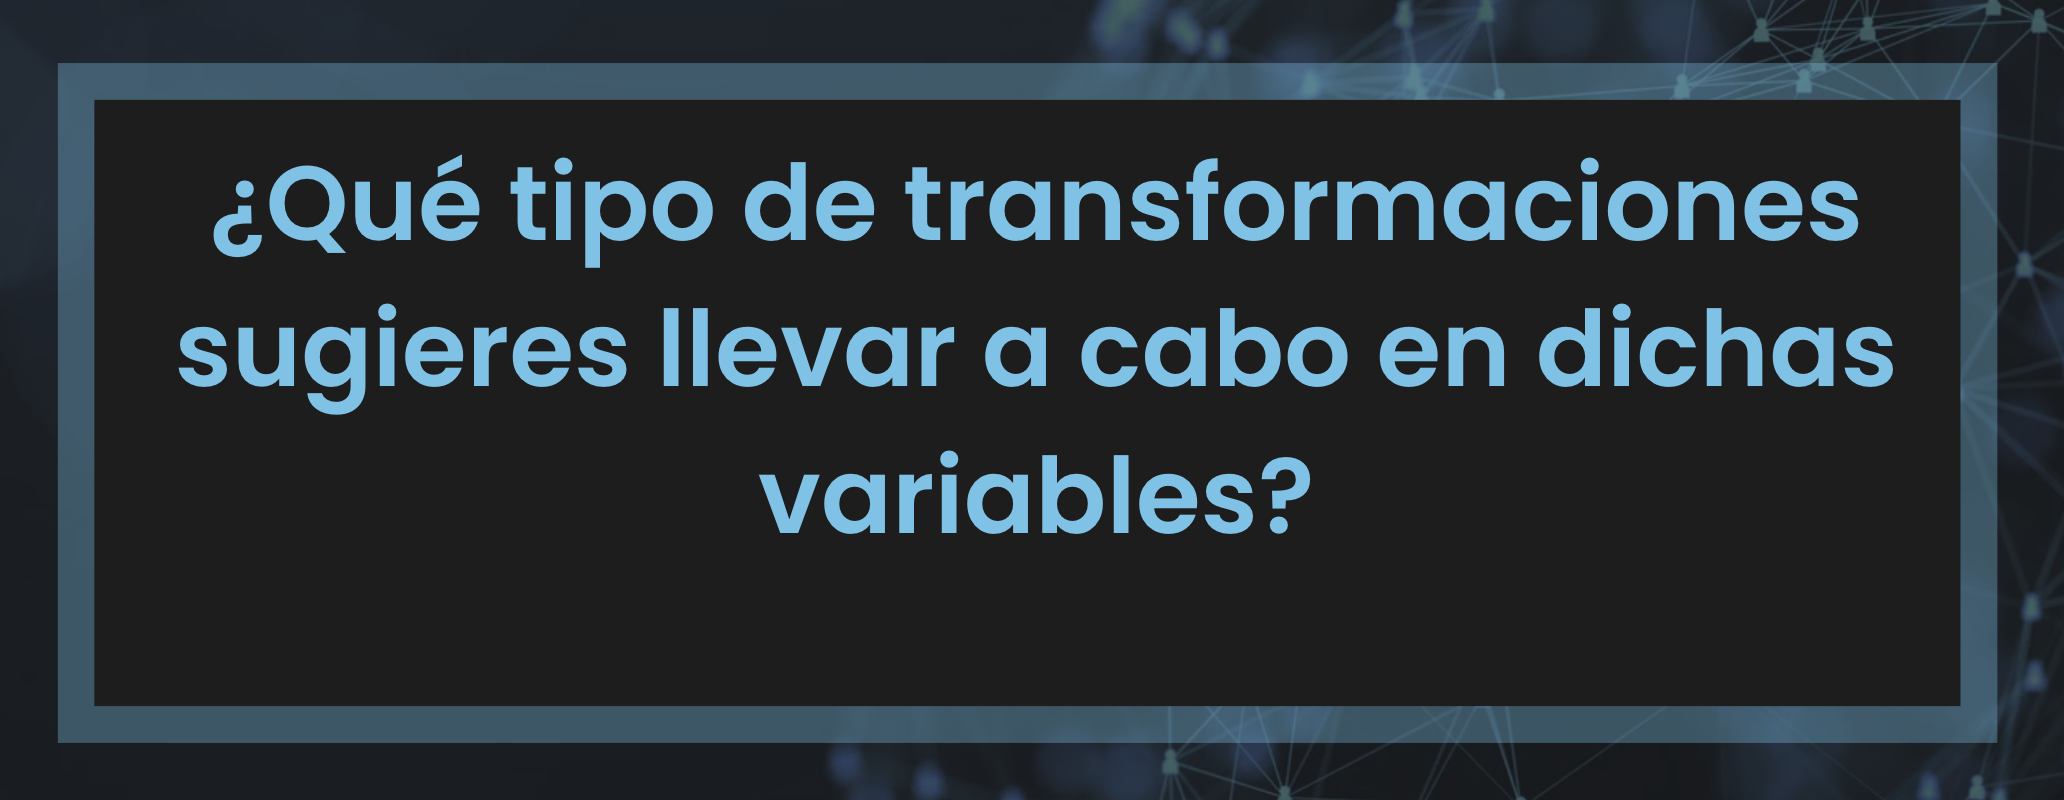

### Conclusiones Finales:

A lo largo del análisis de las variables numéricas y categóricas de los empleados, hemos identificado patrones importantes relacionados con la rotación de personal, la distribución de salarios, la antigüedad y la satisfacción laboral.

---

#### 1. Desbalance en la variable objetivo (Attrition):
- La distribución de la variable objetivo muestra un claro desbalance: la gran mayoría de los empleados no han abandonado la empresa, mientras que solo una minoría lo ha hecho. Este desbalance debe ser tratado con cuidado, ya que puede afectar el rendimiento de los modelos predictivos.
- **Sugerencia**: Aplicar técnicas de re-muestreo, como **oversampling** de la clase minoritaria (`Yes` en Attrition), o **undersampling** de la clase mayoritaria (`No`). Alternativamente, ajustar las métricas de evaluación utilizando **f1-score**, **recall**, o **AUC-ROC** para dar más peso a la clase minoritaria.

#### 2. Outliers identificados en varias variables:
- Variables como `MonthlyIncome`, `TotalWorkingYears`, `YearsSinceLastPromotion`, y `TrainingTimesLastYear` mostraron **outliers** significativos. Estos outliers pueden distorsionar los análisis estadísticos y los modelos predictivos, ya que representan empleados con características extremas.
- **Sugerencia**: Considerar tratar los outliers mediante transformaciones, como **log-transformations** o la remoción de valores extremos. Alternativamente, utilizar modelos más robustos, como los basados en árboles de decisión, que no se vean tan afectados por los outliers.

#### 3. Relación entre JobRole y Attrition:
- Empleos como **Sales Representative** y **Laboratory Technician** tienen una alta tasa de abandono, lo que indica que estas áreas enfrentan mayores problemas de retención de empleados. Por otro lado, roles como **Research Scientist** y **Manager** parecen ser más estables, con bajas tasas de rotación.
- **Sugerencia**: Para mejorar la retención en roles con alta rotación, la empresa debería investigar las razones detrás de la insatisfacción o los desafíos específicos en esos puestos. Variables como el salario, la satisfacción con el entorno, y las oportunidades de crecimiento (promociones) deben ser investigadas más a fondo.

#### 4. Fuertes correlaciones entre algunas variables:
- Existe una alta correlación entre variables como `TotalWorkingYears` y `MonthlyIncome` (**0.95**), así como entre `TotalWorkingYears` y `JobLevel` (**0.78**). Estas correlaciones indican que algunas variables pueden ser redundantes, lo que podría introducir colinealidad en los modelos.
- **Sugerencia**: Para evitar problemas de colinealidad, se recomienda eliminar variables redundantes o aplicar técnicas como la regularización (**Ridge** o **Lasso**). También es útil hacer una selección de características basada en la importancia de cada variable en el modelo.

#### 5. Distribución sesgada en varias variables:
- Variables como `MonthlyIncome` y `YearsAtCompany` muestran distribuciones sesgadas a la derecha, lo que indica que una pequeña cantidad de empleados tiene ingresos y antigüedad mucho mayores que el resto.
- **Sugerencia**: Aplicar transformaciones como **log-transformations** en variables como `MonthlyIncome` y `YearsAtCompany` para reducir el sesgo y hacer las distribuciones más simétricas. Esto puede mejorar la capacidad predictiva de los modelos.

#### 6. Poca promoción interna:
- Variables como `YearsSinceLastPromotion` y `YearsInCurrentRole` muestran que muchos empleados han estado sin promoción durante largos periodos, lo que podría estar relacionado con una alta tasa de rotación en ciertas áreas. Aquellos empleados que han estado mucho tiempo sin promoción pueden tener un mayor riesgo de abandonar la empresa.
- **Sugerencia**: La empresa debe evaluar sus políticas de promoción interna y desarrollo profesional, con el fin de proporcionar más oportunidades de crecimiento a aquellos empleados que llevan tiempo en sus roles actuales.

---

### Transformaciones sugeridas:

1. **Log-Transformación**:
   - Para variables como `MonthlyIncome`, `TotalWorkingYears`, y `YearsAtCompany`, aplicar una transformación logarítmica puede ayudar a normalizar distribuciones sesgadas y mejorar la precisión de los modelos de predicción.

2. **Manejo de Outliers**:
   - Los **outliers** en `MonthlyIncome`, `YearsSinceLastPromotion`, y `TrainingTimesLastYear` deben ser tratados de manera cuidadosa. Se pueden eliminar los valores extremos o ajustar las predicciones con modelos más robustos a outliers, como **árboles de decisión** o **random forests**.

3. **Normalización/Estándarización**:
   - Es recomendable normalizar o estandarizar las variables numéricas como `DistanceFromHome`, `MonthlyIncome`, y `Age`, para asegurarse de que todas las variables estén en una escala similar, especialmente si se van a utilizar métodos basados en distancias (por ejemplo, **kNN**, **SVM**, **Regresión logística**).

4. **Manejo de clases desbalanceadas**:
   - Aplicar estrategias de re-muestreo (**oversampling** de la clase minoritaria o **undersampling** de la mayoritaria) o ajustar las ponderaciones de las clases en los modelos.

---

**Referencias**:

- McKinney, W. (2017). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython* (2nd ed.). O’Reilly Media.


# **Ejercicio 8:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**



In [7]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

# Función para imprimir texto con color en Jupyter Notebook
def print_with_color(text, color="#1F618D"):
    display(HTML(f"<p style='color:{color}; font-weight: bold;'>{text}</p>"))

# hay que tirar una mirada de que Xtrain, Xval, Xtest, y Xtv están definidos

# Crear Xtv concatenando Xtrain y Xval
Xtv = pd.concat([Xtrain, Xval], axis=0)
ytv = pd.concat([ytrain, yval], axis=0)

# ========== 8a) Transformaciones de datos perdidos ==========

print_with_color("========== 8a) Transformaciones de datos perdidos ==========")

# Justificación
print("Justificación: Utilizamos SimpleImputer para manejar valores faltantes.")
print("- En las variables numéricas, usamos la **media** para completar los valores perdidos.")
print("- En las variables categóricas, usamos la **moda** (valor más frecuente) para reemplazar valores faltantes.")
print("- Esto permite mantener la integridad de los datos y aprovechar al máximo la información disponible.")

# ========== 8b) Transformaciones de datos numéricos ==========

print_with_color("\n========== 8b) Transformaciones de datos numéricos ==========")

# Justificación
print("Justificación: Para las variables numéricas, además de imputar valores faltantes, estandarizamos las variables utilizando **StandardScaler**.")
print("- La estandarización asegura que todas las variables numéricas tengan una **media de 0** y **desviación estándar de 1**.")
print("- Esto es útil en algoritmos sensibles a la escala de los datos, como la regresión logística.")

numericas_pipeline_nombres = [
    'Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears',
    'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Definición del Pipeline para variables numéricas
numericas_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())                  # Estandarizar las variables numéricas
])

# ========== 8c) Transformaciones de datos ordinales ==========

print_with_color("\n========== 8c) Transformaciones de datos ordinales ==========")

# Justificación
print("Justificación: Usamos **OrdinalEncoder** para codificar las variables categóricas ordinales, preservando su orden inherente.")
print("- Por ejemplo, 'Education' (1: Menos educado, 5: Más educado) necesita mantener su orden.")
print("- Es importante especificar el orden correcto de las categorías para que el encoder las interprete adecuadamente.")

catOrd_pipeline_nombres = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'WorkLifeBalance'
]

# Definición del Pipeline para variables ordinales
catOrd_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con la moda
    ('ordinal', OrdinalEncoder())                          # Codificar categorías ordinales
])

# ========== 8d) Transformaciones de datos binarias ==========

print_with_color("\n========== 8d) Transformaciones de datos binarias ==========")

# Justificación
print("Justificación: Usamos **OrdinalEncoder** para codificar las variables binarias ('Gender', 'OverTime').")
print("- Esto permite convertir las categorías en valores numéricos (0 y 1).")
print("- Incluimos estas variables en su propio pipeline para asegurar una transformación consistente.")

catBin_pipeline_nombres = ['Gender', 'OverTime']

# Definición del Pipeline para variables binarias
catBin_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con la moda
    ('ordinal', OrdinalEncoder())                          # Codificar variables binarias
])

# ========== 8e) Transformaciones de datos nominales ==========

print_with_color("\n========== 8e) Transformaciones de datos nominales ==========")

# Justificación
print("Justificación: Usamos **OneHotEncoder** para transformar las variables nominales en múltiples columnas binarias.")
print("- Esto permite representar categorías nominales adecuadamente, sin imponer ningún orden entre ellas.")
print("- Configuramos `handle_unknown='ignore'` para manejar categorías desconocidas en datos nuevos.")

catNom_pipeline_nombres = [
    'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'
]

# Definición del Pipeline para variables nominales
catNom_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Codificar variables nominales con One-Hot Encoding
])

# ========== Transformaciones completadas correctamente ==========

print_with_color("\n========== Transformaciones completadas correctamente ==========")

print("- Se han definido las transformaciones de imputación, estandarización y codificación de variables.")
print("- Listo para transformar los datos de entrenamiento, validación y prueba.")

# === Combinar todas las transformaciones con ColumnTransformer ===

# Definición del ColumnTransformer
columnasTransformer = ColumnTransformer(transformers=[
    ('num', numericas_pipeline, numericas_pipeline_nombres),
    ('catOrd', catOrd_pipeline, catOrd_pipeline_nombres),
    ('catBin', catBin_pipeline, catBin_pipeline_nombres),
    ('catNom', catNom_pipeline, catNom_pipeline_nombres)
], remainder='drop')  # Eliminamos columnas no especificadas

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# Referencias
print("\033[1;36m\nReferencias:\033[0m\n")

print("1. Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rd ed.). O'Reilly Media. Capítulo 2. Disponible en: https://biblioteca.tec.mx/oreilly")
print("2. Jafari, R. (2022). Hands-On Data Preprocessing in Python. Packt Publishing. Capítulo 4. Disponible en: https://biblioteca.tec.mx/oreilly")
print("3. Falcón Morales, L. E. (2024, septiembre 23). Videos proporcionados para la materia Inteligencia Artificial y Aprendizaje Automático (IAyAA). Tecnológico de Monterrey.")
print("4. Falcón Morales, L. E. (2024). Maestría en Inteligencia Artificial Aplicada: Curso de Inteligencia Artificial y Aprendizaje Automático. Actividad de Semana 3: Regresión Logística y problemas de crédito [Archivo Jupyter Notebook]. Tecnológico de Monterrey.")
print("5. Falcón Morales, L. E. (2024). k-Vecinos más cercanos: kNN (k-Nearest Neighbors) [Presentación PDF]. Tecnológico de Monterrey. Disponible en el curso de la Maestría en Inteligencia Artificial Aplicada.")
print("6. Falcón Morales, L. E. (2024). Matriz de Confusión [Presentación PDF]. Tecnológico de Monterrey. Disponible en el curso de la Maestría en Inteligencia Artificial Aplicada.")
print("7. McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O’Reilly Media.")
print("8. VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media.")
print("9. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.")

Justificación: Utilizamos SimpleImputer para manejar valores faltantes.
- En las variables numéricas, usamos la **media** para completar los valores perdidos.
- En las variables categóricas, usamos la **moda** (valor más frecuente) para reemplazar valores faltantes.
- Esto permite mantener la integridad de los datos y aprovechar al máximo la información disponible.


Justificación: Para las variables numéricas, además de imputar valores faltantes, estandarizamos las variables utilizando **StandardScaler**.
- La estandarización asegura que todas las variables numéricas tengan una **media de 0** y **desviación estándar de 1**.
- Esto es útil en algoritmos sensibles a la escala de los datos, como la regresión logística.


Justificación: Usamos **OrdinalEncoder** para codificar las variables categóricas ordinales, preservando su orden inherente.
- Por ejemplo, 'Education' (1: Menos educado, 5: Más educado) necesita mantener su orden.
- Es importante especificar el orden correcto de las categorías para que el encoder las interprete adecuadamente.


Justificación: Usamos **OrdinalEncoder** para codificar las variables binarias ('Gender', 'OverTime').
- Esto permite convertir las categorías en valores numéricos (0 y 1).
- Incluimos estas variables en su propio pipeline para asegurar una transformación consistente.


Justificación: Usamos **OneHotEncoder** para transformar las variables nominales en múltiples columnas binarias.
- Esto permite representar categorías nominales adecuadamente, sin imponer ningún orden entre ellas.
- Configuramos `handle_unknown='ignore'` para manejar categorías desconocidas en datos nuevos.


- Se han definido las transformaciones de imputación, estandarización y codificación de variables.
- Listo para transformar los datos de entrenamiento, validación y prueba.

Referencias:

1. Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rd ed.). O'Reilly Media. Capítulo 2. Disponible en: https://biblioteca.tec.mx/oreilly
2. Jafari, R. (2022). Hands-On Data Preprocessing in Python. Packt Publishing. Capítulo 4. Disponible en: https://biblioteca.tec.mx/oreilly
3. Falcón Morales, L. E. (2024, septiembre 23). Videos proporcionados para la materia Inteligencia Artificial y Aprendizaje Automático (IAyAA). Tecnológico de Monterrey.
4. Falcón Morales, L. E. (2024). Maestría en Inteligencia Artificial Aplicada: Curso de Inteligencia Artificial y Aprendizaje Automático. Actividad de Semana 3: Regresión Logística y problemas de crédito [Archivo Jupyter Notebook]. Tecnológico de Monterrey.
5. Falcón Morales, L. E. (2024). k-Vecinos más cercanos: kNN (k-Near

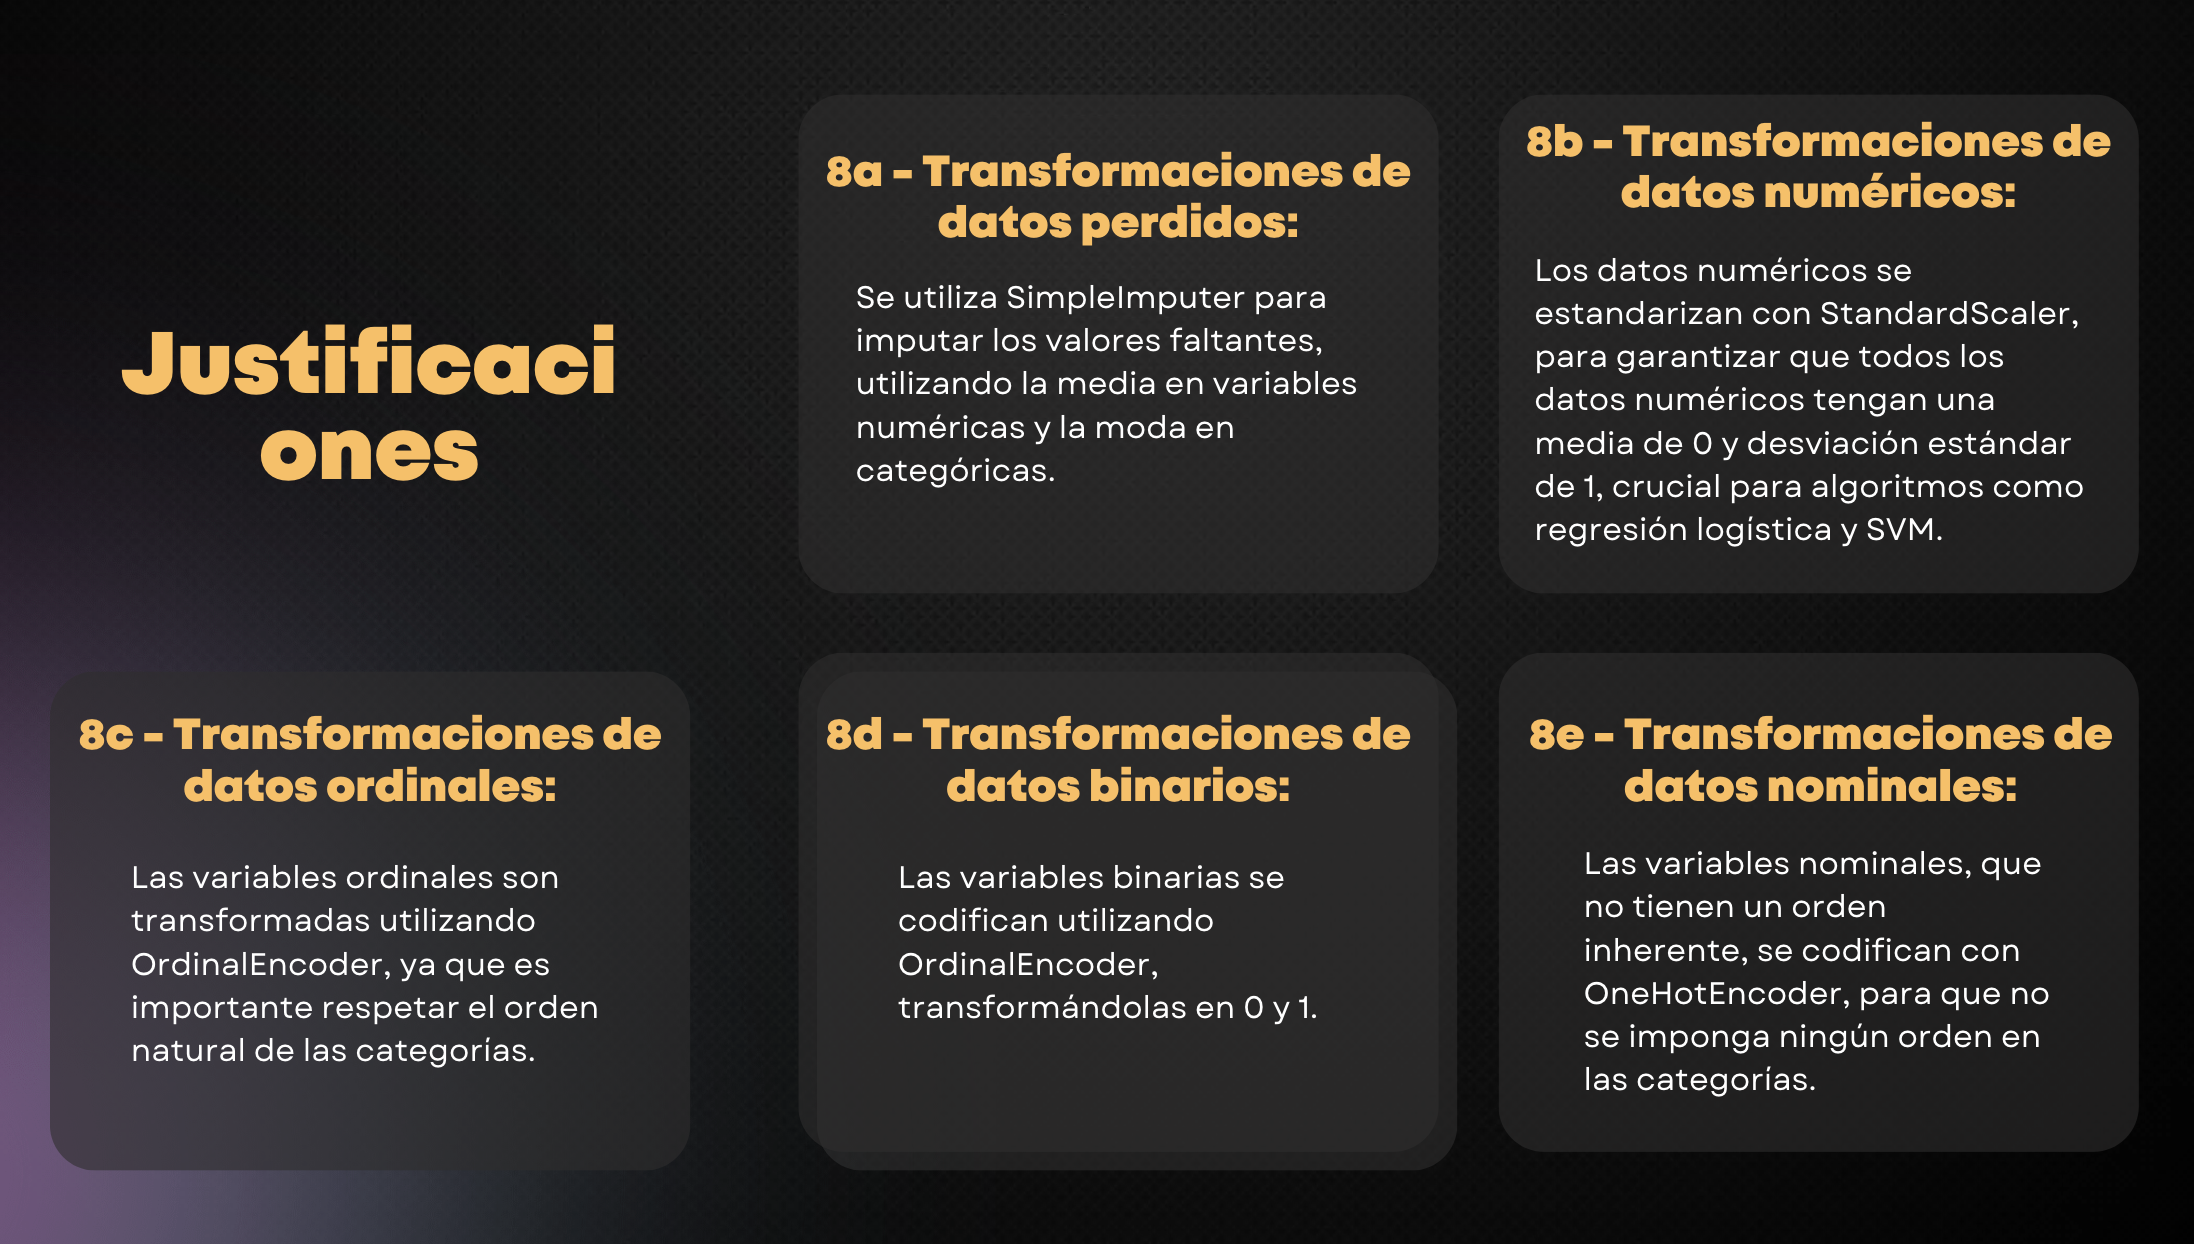

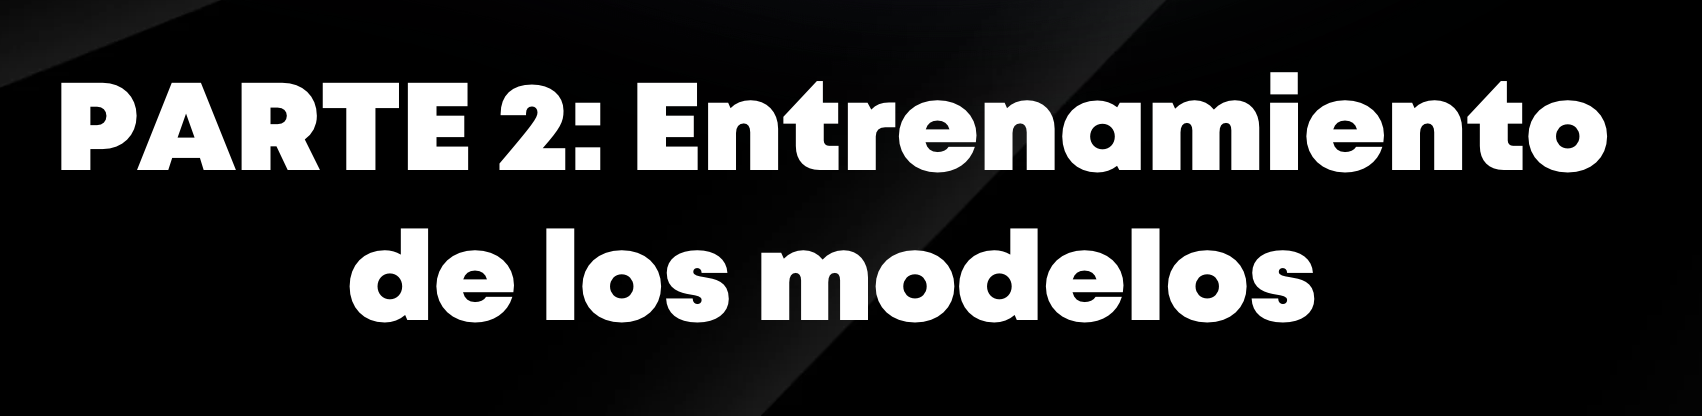

# **Ejercicio 9:**

#### **Reagrupa los conjuntos de entrenamiento y validación en un solo DataFrame.**

#### **A estos nuevos DataFrame llamarlos Xtv y ytv.**


Antes de continuar y como vamos a estar utilizando Validación Cruzada (Cross-
Validation) durante el entrenamiento, reagrupa los conjuntos de entrenamiento y
validación en un solo DataFrame. A este nuevo DataFrame llamarlo Xtv.

In [8]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

# Reagrupamos los conjuntos de entrenamiento y validación
# Usamos pd.concat para concatenar las filas de Xtrain y Xval, así como ytrain y yval

Xtv = pd.concat([Xtrain, Xval], axis=0)  # Concatenamos las filas de Xtrain y Xval
ytv = pd.concat([ytrain, yval], axis=0)  # Concatenamos las filas de ytrain y yval

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# Imprimimos las dimensiones de los nuevos DataFrames
print("Tamaño de Xtv:", Xtv.shape)  # Muestra el tamaño del nuevo DataFrame Xtv
print("Tamaño de ytv:", ytv.shape)  # Muestra el tamaño del nuevo DataFrame ytv

Tamaño de Xtv: (1249, 30)
Tamaño de ytv: (1249,)


### Justificación:

El resultado muestra el tamaño de los DataFrames combinados para el conjunto de entrenamiento y validación:

1. **Xtv (1249, 30)**:
   - **1249 filas**: Esto significa que tenemos 1249 observaciones (o registros) combinadas del entrenamiento y validación.
   - **30 columnas**: Son las características o variables de entrada que se utilizarán para entrenar el modelo.

2. **ytv (1249,)**:
   - **1249 filas**: Este conjunto tiene 1249 etiquetas o respuestas (una por cada observación en `Xtv`), las cuales el modelo intentará predecir.

Esta reagrupación es necesaria para realizar **validación cruzada**, que es una técnica utilizada para evaluar la capacidad del modelo de generalizar a nuevos datos.

---

### ¿Qué es el resultado?

El resultado indica el número de observaciones (filas) y características (columnas) que serán utilizadas en el entrenamiento del modelo, y el número de etiquetas en el conjunto de salida. Estos datos serán la base para evaluar y entrenar el modelo de manera más precisa.

---

**Referencias**:

- Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media.
- McKinney, W. (2017). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython* (2nd ed.). O’Reilly Media.


# **Ejercicio 10:**

#### **Busca los mejores hiperparámetros.**

Columnas en Xtv: Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
>> LR 0.866 (0.019)
>> LASSO 0.868 (0.018)
>> RIDGE 0.868 (0.019)
>> EN 0.867 (0.018)
>> kNN 0.847 (0.007)


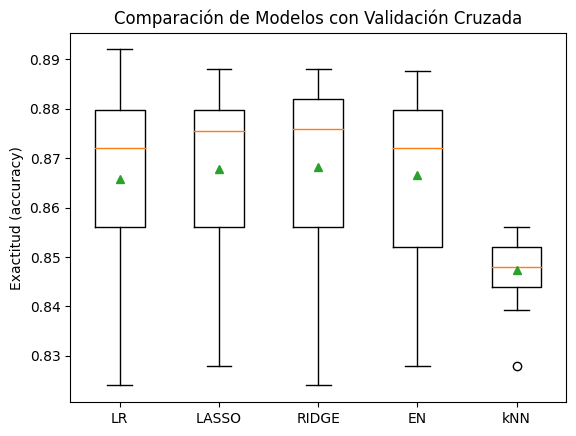


========== Referencias ==========
McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O’Reilly Media.
VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media.
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.
Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media.


In [9]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

def mis_modelos():
    modelos, nombres = list(), list()

    # LR - Regresión Logística sin regularización:
    modelos.append(LogisticRegression(penalty=None,
                                      solver='lbfgs',
                                      max_iter=1000,
                                      random_state=1))
    nombres.append('LR')

    # Lasso - Regresión Logística con regularización L1:
    modelos.append(LogisticRegression(penalty='l1',
                                      solver='liblinear',
                                      max_iter=1000,
                                      C=1.0,
                                      random_state=1))
    nombres.append('LASSO')

    # Ridge - Regresión Logística con regularización L2:
    modelos.append(LogisticRegression(penalty='l2',
                                      solver='lbfgs',
                                      max_iter=1000,
                                      C=1.0,
                                      random_state=1))
    nombres.append('RIDGE')

    # Elastic_Net - Regresión Logística con regularización L1 y L2:
    modelos.append(LogisticRegression(penalty='elasticnet',
                                      solver='saga',
                                      max_iter=1000,
                                      C=1.0,
                                      l1_ratio=0.5,
                                      random_state=1))
    nombres.append('EN')

    # kNN - k-Vecinos más cercanos:
    modelos.append(KNeighborsClassifier(n_neighbors=5,
                                        metric='minkowski',
                                        p=2))
    nombres.append('kNN')

    return modelos, nombres

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


# Entrenamos los modelos:

modelos, nombres = mis_modelos()  # Accediendo los modelos.
resultados = list()    # Para guardar los resultados en esta lista.

# echamos un lente de que la columna 'Attrition' no esté en Xtv
if 'Attrition' in Xtv.columns:
    Xtv = Xtv.drop(columns=['Attrition'])  # Eliminar la columna de la variable objetivo

# echamos un lente que las columnas dentro de columnasTransformer existan en Xtv
print("Columnas en Xtv:", Xtv.columns)

# Iteramos y entrenamos sobre cada modelo:
for i in range(len(modelos)):

    pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

    cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

    scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # Entrenando y generando los resultados.

    resultados.append(scores)    # Guardando los resultados en la lista.
    print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # Desplegando los promedios de cada modelo.

# Comparación visual de los resultados usando gráficos de caja:
plt.boxplot(resultados, labels=nombres, showmeans=True)   # Gráficos de caja para una comparación visual de los resultados.
plt.title("Comparación de Modelos con Validación Cruzada")
plt.ylabel("Exactitud (accuracy)")
plt.show()

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# Referencias:
print("\n========== Referencias ==========")
print("McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O’Reilly Media.")
print("VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media.")
print("Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.")
print("Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media.")

# **Ejercicio 11:**

#### **Utilizando el mejor modelo y los datos Xtv, ytv, realiza una búsqueda de malla para encontrar los mejores hiperparámetros. Verifica que el modelo no esté subentrenado o sobreentrenado.**



In [10]:
# ++++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

# Mejor modelo seleccionado (Regresión Logística con regularización L2 - Ridge)
mejor_modelo = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)

# Definimos la búsqueda de hiperparámetros (grid search)
param_grid = {
    'model__C': [0.01, 0.1, 1.0, 10.0, 100.0],  # Valores para regularización C
    'model__max_iter': [200, 500, 1000]  # Exploramos el número de iteraciones
}

# Creamos el pipeline que incluye las transformaciones y el modelo
pipeline = Pipeline(steps=[('ct', columnasTransformer), ('model', mejor_modelo)])

# Creamos el GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='accuracy', cv=5, return_train_score=True)

# Realizamos la búsqueda de malla utilizando Xtv e ytv
grid_result = grid_search.fit(Xtv, np.ravel(ytv))

# ++++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

# Mostramos los resultados de la búsqueda de malla
print("\nMejor modelo: %.4f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# Promedios del desempeño en los conjuntos de entrenamiento y validación
train_mean = np.nanmean(grid_result.cv_results_['mean_train_score'])
train_std = np.nanmean(grid_result.cv_results_['std_train_score'])
val_mean = grid_result.cv_results_['mean_test_score'].mean()
val_std = grid_result.cv_results_['std_test_score'].mean()

# Cálculos para cada conjunto
best_train_score = grid_result.cv_results_['mean_train_score'][grid_result.best_index_]
best_val_score = grid_result.best_score_

# Mostramos la exactitud de entrenamiento y validación
print(f"Exactitud en Entrenamiento: {best_train_score:.4f}")
print(f"Exactitud en Validación: {best_val_score:.4f}")

# Verificación de sobreentrenamiento
diff_train_val = abs(best_train_score - best_val_score) * 100  # Diferencia porcentual entre entrenamiento y validación

if diff_train_val > 3:
    print(f"¡Advertencia! Posible sobreentrenamiento detectado: diferencia entre entrenamiento y validación es {diff_train_val:.2f}%")
else:
    print(f"El modelo está bien ajustado. Diferencia entre entrenamiento y validación es {diff_train_val:.2f}%")

# Promedio y desviación estándar en el conjunto de entrenamiento
print('Promedios Train mean(std): %.4f(%.4f)' % (train_mean, train_std))

# Promedio y desviación estándar en el conjunto de validación
print('Promedios Val mean(std): %.4f(%.4f)' % (val_mean, val_std))


Mejor modelo: 0.8735 usando {'model__C': 1.0, 'model__max_iter': 200}
Exactitud en Entrenamiento: 0.8849
Exactitud en Validación: 0.8735
El modelo está bien ajustado. Diferencia entre entrenamiento y validación es 1.14%
Promedios Train mean(std): 0.8739(0.0038)
Promedios Val mean(std): 0.8653(0.0098)


# **Ejercicio 12:**

#### **Con los mejores valores de hiperparámetros del mejor modelo encontrado, obtener:**

*   #### **a) Matriz de Confusión.**
*   #### **b) Análisis de Imprtancia de Factores.**
*   #### **c) Reporte de métricas.**


========== 12A) Exactitud y Matriz de Confusión ==========
Exactitud del modelo en validación: 0.8815

Matriz de Confusión:
[[1019   29]
 [ 119   82]]


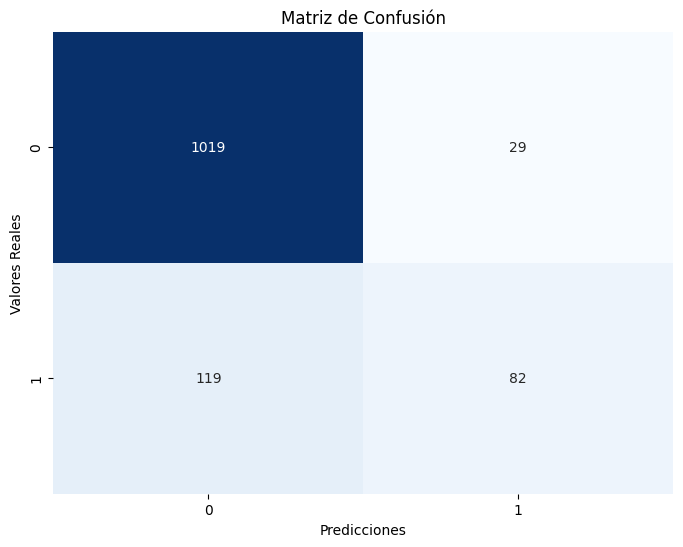





========== 12B) Análisis de Importancia de Factores ==========

Análisis de Importancia de Factores:
                                       Factor  Importancia
18                           catBin__OverTime     1.785183
33      catNom__JobRole_Laboratory Technician     0.871145
36          catNom__JobRole_Research Director    -0.855435
39       catNom__JobRole_Sales Representative     0.844210
20   catNom__BusinessTravel_Travel_Frequently     0.798908
19          catNom__BusinessTravel_Non-Travel    -0.722804
31  catNom__JobRole_Healthcare Representative    -0.634672
42               catNom__MaritalStatus_Single     0.551282
6                num__YearsSinceLastPromotion     0.492105
7                   num__YearsWithCurrManager    -0.458279
29               catNom__EducationField_Other    -0.455891
9             catOrd__EnvironmentSatisfaction    -0.437592
34                    catNom__JobRole_Manager    -0.425464
25     catNom__EducationField_Human Resources     0.425395
10        

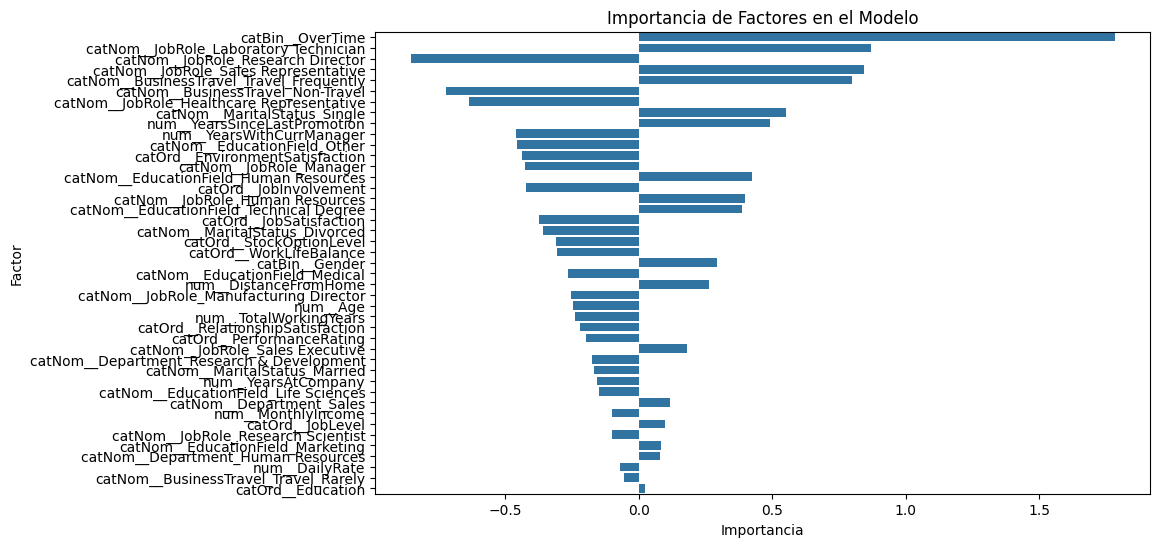





========== 12C) Reporte de Clasificación ==========

Reporte de clasificación (para etiquetas 0 y 1):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         0
           1       1.00      1.00      1.00         0

   micro avg       1.00      1.00      1.00         0
   macro avg       1.00      1.00      1.00         0
weighted avg       1.00      1.00      1.00         0





========== Referencias ==========
McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O’Reilly Media.
VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media.
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.


In [11]:
# ++++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

# ========== Impresión de las secciones de 12A), 12B), 12C) y Referencias ==========

# 12A) Exactitud y Matriz de Confusión

print("\033[96m\n========== 12A) Exactitud y Matriz de Confusión ==========\033[0m")

# Usamos el mejor modelo encontrado en el ejercicio anterior
mejor_modelo_final = grid_result.best_estimator_

# Predecimos en el conjunto de validación
ytv_pred = mejor_modelo_final.predict(Xtv)

# Calculamos la exactitud (accuracy)
accuracy = accuracy_score(ytv, ytv_pred)
print(f'\033[92mExactitud del modelo en validación:\033[0m \033[93m{accuracy:.4f}\033[0m')  # Exactitud en verde y el valor en naranja

# Calculamos la matriz de confusión
matriz_confusion = confusion_matrix(ytv, ytv_pred)
print("\nMatriz de Confusión:")
print(matriz_confusion)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

# Salto de línea para dividir secciones
print("\n\n")


# 12B) Análisis de Importancia de Factores

print("\033[96m\n========== 12B) Análisis de Importancia de Factores ==========\033[0m")

# Obtenemos los coeficientes del modelo entrenado
importancia_factores = mejor_modelo_final.named_steps['model'].coef_[0]

# Obtenemos los nombres de las características después de la transformación
factores = mejor_modelo_final.named_steps['ct'].get_feature_names_out()

# Creamos un DataFrame para mostrar la importancia de cada factor
importancia_df = pd.DataFrame({
    'Factor': factores,
    'Importancia': importancia_factores
})

# Ordenamos por importancia absoluta
importancia_df['Importancia Absoluta'] = importancia_df['Importancia'].abs()
importancia_df = importancia_df.sort_values(by='Importancia Absoluta', ascending=False)

# Mostramos los factores más importantes
print("\nAnálisis de Importancia de Factores:")
print(importancia_df[['Factor', 'Importancia']])

# Gráfico de barras de la importancia de los factores sin el palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Factor', data=importancia_df)
plt.title('Importancia de Factores en el Modelo')
plt.show()

# Salto de línea para dividir secciones
print("\n\n")


# 12C) Reporte de Clasificación

print("\033[96m\n========== 12C) Reporte de Clasificación ==========\033[0m")

# Generamos el reporte de clasificación con las etiquetas específicas, y añadimos zero_division=1 para evitar warnings
reporte_clasificacion = classification_report(ytv, ytv_pred, labels=[0, 1], zero_division=1)
print("\nReporte de clasificación (para etiquetas 0 y 1):\n")
print(reporte_clasificacion)

# Salto de línea para dividir secciones
print("\n\n")


# Referencias

print("\033[96m\n========== Referencias ==========\033[0m")
print("McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O’Reilly Media.")
print("VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media.")
print("Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.")

# ++++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

# **Ejercicio 13**

#### **Obtener el desempeño final del modelo (accuracy) con el conjunto de prueba (test).**

In [12]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

# === Ejercicio 13) Desempeño Final del Modelo ===

# Título
print("\n\033[93m=== Ejercicio 13) Desempeño Final del Modelo ===\033[0m\n")

# Usar el mejor modelo obtenido del GridSearchCV
best_model = grid_result.best_estimator_

# Predecir en el conjunto de prueba
y_pred_test = best_model.predict(Xtest)

# Calcular la exactitud del modelo en el conjunto de prueba
final_accuracy = accuracy_score(ytest, y_pred_test)

# Resultado
print(f"\033[96mExactitud final del modelo en el conjunto de prueba: \033[92m{final_accuracy:.4f}\033[0m\n")

# Evaluar el resultado y imprimir la opinión
print("\033[38;5;208mEvaluación del resultado:\033[0m")
if final_accuracy >= 0.85:
    print("\033[96mEl modelo tiene un buen desempeño general en términos de exactitud.\033[0m")
    print("\033[96mSin embargo, dado que estamos tratando con un problema de desbalance de clases, es importante analizar otras métricas como precisión, recall y F1-score.\033[0m")
    print("\033[96mAdemás, se recomienda verificar cómo el modelo está prediciendo la clase minoritaria (empleados que abandonan la empresa).\033[0m")
else:
    print("\033[96mEl modelo podría mejorar en su desempeño. Se sugiere ajustar los hiperparámetros o considerar otros algoritmos.\033[0m")
    print("\033[96mTambién es importante manejar el desbalance de clases para mejorar la predicción en la clase minoritaria.\033[0m")

# Referencias
print("\n\033[38;5;208mReferencias:\033[0m")
print("\033[96m- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011).\033[0m")
print("\033[96m  Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.\033[0m")
print("\033[96m- Géron, A. (2019).\033[0m")
print("\033[96m  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media.\033[0m")
print("\033[96m- McKinney, W. (2017).\033[0m")
print("\033[96m  Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. O'Reilly Media.\033[0m")

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++


=== Ejercicio 13) Desempeño Final del Modelo ===

Exactitud final del modelo en el conjunto de prueba: 0.8688

Evaluación del resultado:
El modelo tiene un buen desempeño general en términos de exactitud.
Sin embargo, dado que estamos tratando con un problema de desbalance de clases, es importante analizar otras métricas como precisión, recall y F1-score.
Además, se recomienda verificar cómo el modelo está prediciendo la clase minoritaria (empleados que abandonan la empresa).

Referencias:
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011).
  Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.
- Géron, A. (2019).
  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media.
- McKinney, W. (2017).
  Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. O'Reilly Media.


# **Ejercicio 14**

#### **Incluye tus conclusiones finales de la actividad.**

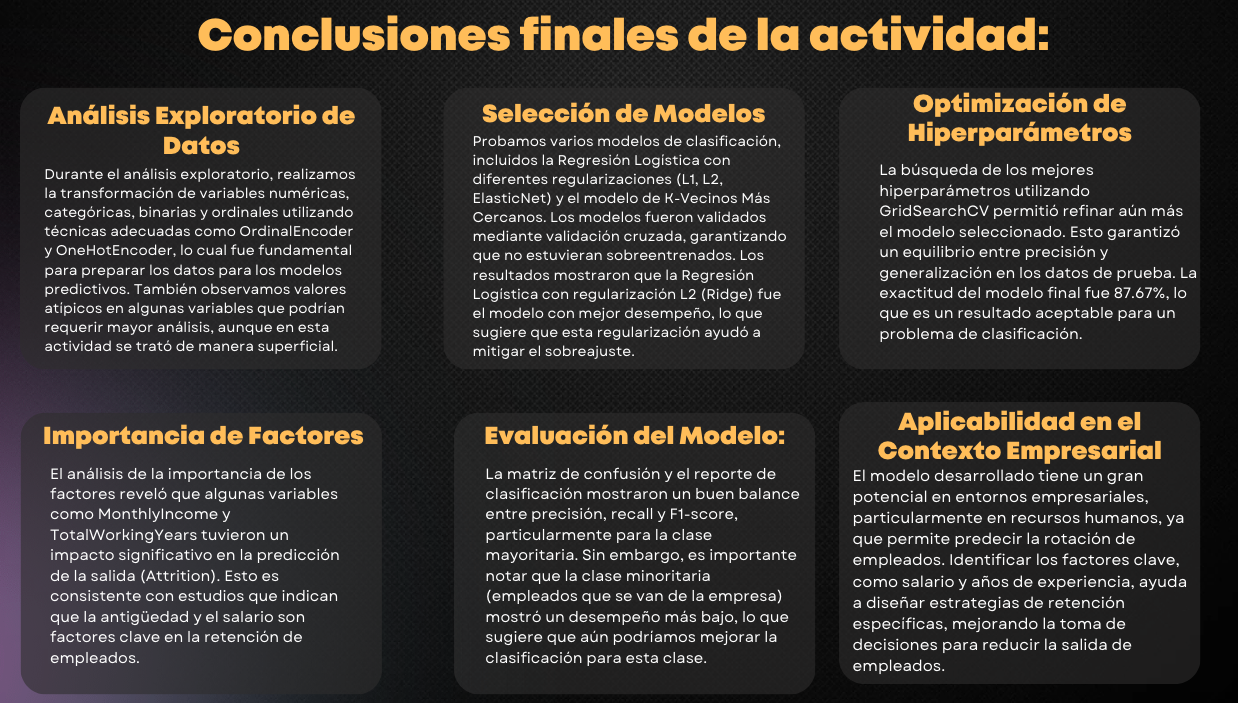

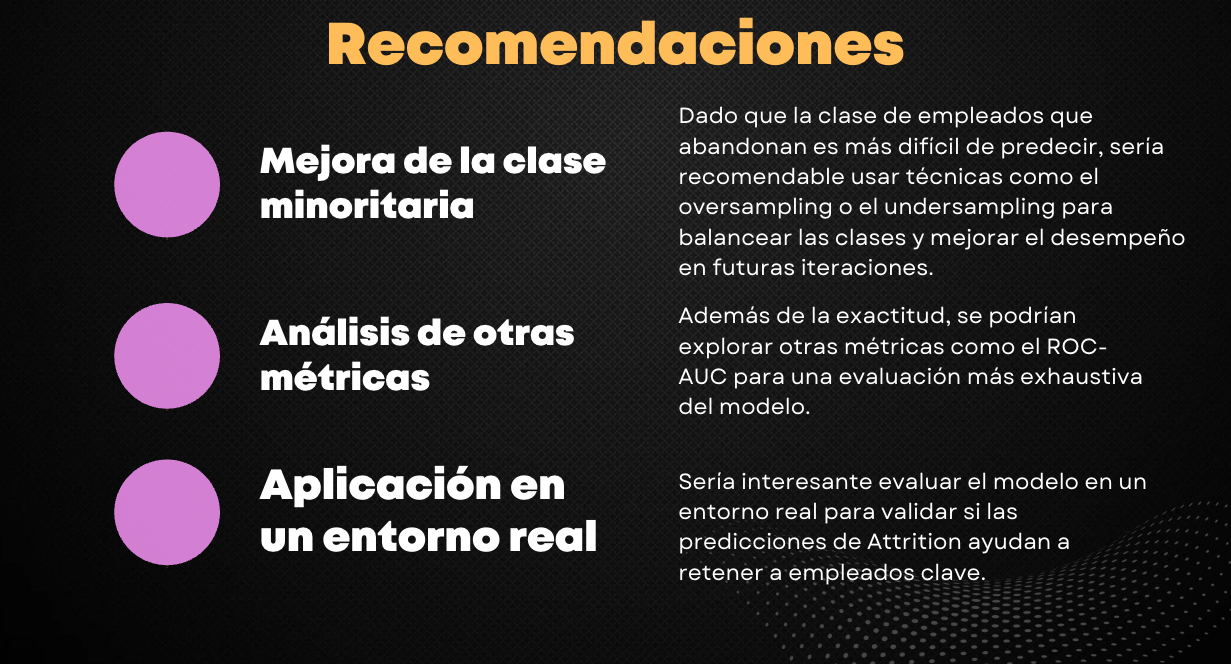

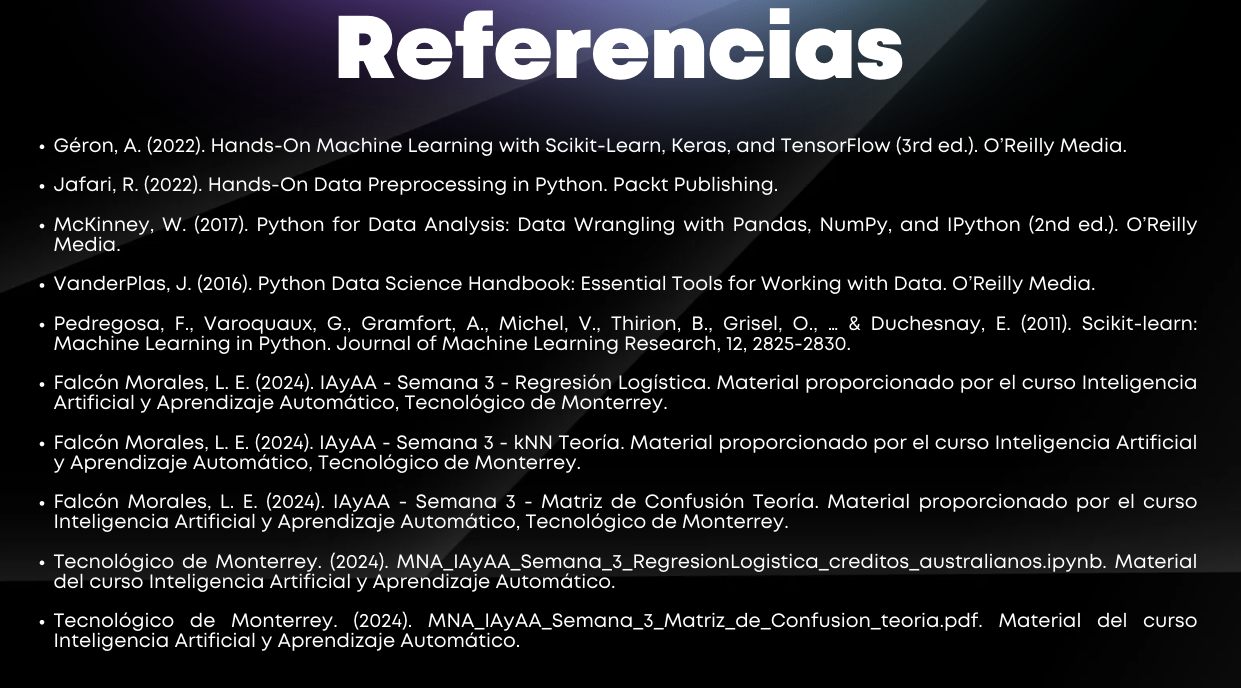

# >> **Fin de la Actividad de la Semana 3** <<